## Importing Necessary Packages

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.5f}'.format

## Reading the Dataset

In [459]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87000,B,B2,NaN,10+ years,RENT,24000.00000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65000,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00000,0.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,Jan-15,171.62000,NaN,May-16,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83000,C,C4,Ryder,< 1 year,RENT,30000.00000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00000,0.00000,1008.71000,1008.71000,456.46000,435.17000,0.00000,117.08000,1.11000,Apr-13,119.66000,NaN,Sep-13,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33000,C,C5,NaN,10+ years,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72000,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00000,0.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,Jun-14,649.91000,NaN,May-16,0.00000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00000,0,Feb-96,1,35.00000,NaN,10,0,5598,21%,37,f,0.00000,0.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,

In [460]:
df.shape

(39717, 111)

### Inference: 
    1) The Dataset consists of 39717 rows and 111 columns 

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Inference:
    1) Their are 74 columns of float type, 13 of integer type and 24 of textual/object type respectively 

## Loan Status Column Analysis

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64 

 Fully Paid    82.96196
Charged Off   14.16774
Current        2.87031
Name: loan_status, dtype: float64


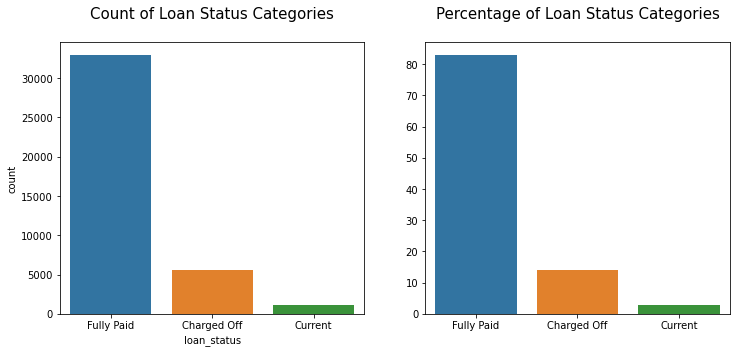

In [462]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12, 5))

print(df['loan_status'].value_counts() ,'\n\n',df['loan_status'].value_counts(normalize=True)*100)

sns.countplot(data=df, x='loan_status',ax=ax[0])
ax[0].set_title("Count of Loan Status Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

sns.barplot(x= df['loan_status'].value_counts().index, y=(df['loan_status'].value_counts(normalize=True)*100).values,ax=ax[1])
ax[1].set_title("Percentage of Loan Status Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

plt.show();

### Inference:
    1) The Loan Status column consists of three unique categories namely; Fully Paid, Charged Off and Current respectively.
    2) The column is highly skewed as fully paid category has 32950(~83%) datapoints, Charged Off has 5627(~14%) and current has 1140 (~3%) of datapoints respectively.

### Retaining only those rows where loan_status is not equal to Current as goal is to find out which customer is likely to default which can only be analysed for either fully paid or charged off loans.

In [463]:
df=df[df['loan_status']!= 'Current']

In [464]:
df.shape

(38577, 111)

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64 

 Fully Paid    85.41359
Charged Off   14.58641
Name: loan_status, dtype: float64


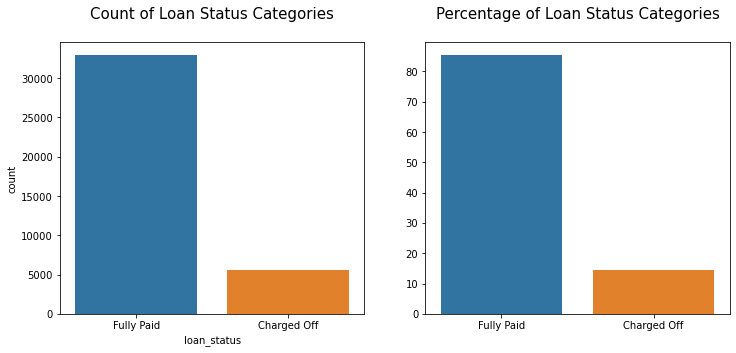

In [465]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12, 5))

print(df['loan_status'].value_counts() ,'\n\n',df['loan_status'].value_counts(normalize=True)*100)

sns.countplot(data=df, x='loan_status',ax=ax[0])
ax[0].set_title("Count of Loan Status Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

sns.barplot(x= df['loan_status'].value_counts().index, y=(df['loan_status'].value_counts(normalize=True)*100).values,ax=ax[1])
ax[1].set_title("Percentage of Loan Status Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

plt.show();

### Inference:
    1) The fully paid category has 32950(~85%) datapoints and Charged Off has 5627(~15%) datapoints respectively.

## Checking the percentage of null values in each column

In [466]:
null_df = df.isnull().mean().sort_values(ascending=False)*100
null_df

verification_status_joint        100.00000
annual_inc_joint                 100.00000
mo_sin_old_rev_tl_op             100.00000
mo_sin_old_il_acct               100.00000
bc_util                          100.00000
bc_open_to_buy                   100.00000
avg_cur_bal                      100.00000
acc_open_past_24mths             100.00000
inq_last_12m                     100.00000
total_cu_tl                      100.00000
inq_fi                           100.00000
total_rev_hi_lim                 100.00000
all_util                         100.00000
max_bal_bc                       100.00000
open_rv_24m                      100.00000
open_rv_12m                      100.00000
il_util                          100.00000
total_bal_il                     100.00000
mths_since_rcnt_il               100.00000
open_il_24m                      100.00000
open_il_12m                      100.00000
open_il_6m                       100.00000
open_acc_6m                      100.00000
tot_cur_bal

In [467]:
sum(null_df>=90),sum(null_df==100)

(56, 55)

### Inference:
    1) 55 columns are 100% empty and 1 column is more than 90% empty
    2) Imputing these values with any value will create column with very very less variance and will not be useful in EDA
    3) Dropping these columns

In [468]:
df.drop(null_df[null_df>=90].index,axis=1,inplace=True)

In [469]:
df.shape

(38577, 55)

### Checking the percentage of null values in remaining columns

In [470]:
null_df[(null_df>0) & (null_df<90)]

mths_since_last_delinq       64.55919
desc                         32.47272
emp_title                     6.18503
emp_length                    2.67776
pub_rec_bankruptcies          1.80678
last_pymnt_d                  0.18405
collections_12_mths_ex_med    0.14516
chargeoff_within_12_mths      0.14516
revol_util                    0.12961
tax_liens                     0.10110
title                         0.02851
last_credit_pull_d            0.00518
dtype: float64

## Checking the variance of each column

In [471]:
var_df= df.var().sort_values()
var_df

out_prncp                              0.00000
delinq_amnt                            0.00000
chargeoff_within_12_mths               0.00000
acc_now_delinq                         0.00000
policy_code                            0.00000
collections_12_mths_ex_med             0.00000
out_prncp_inv                          0.00000
tax_liens                              0.00000
pub_rec_bankruptcies                   0.04185
pub_rec                                0.05655
delinq_2yrs                            0.24233
inq_last_6mths                         1.14821
open_acc                              19.37398
dti                                   44.52952
total_rec_late_fee                    53.52211
total_acc                            130.55029
mths_since_last_delinq               485.23688
collection_recovery_fee            22751.75609
installment                        43530.32184
recoveries                        488112.07656
total_rec_int                    5709707.91237
last_pymnt_am

In [472]:
sum(var_df==0)

8

### Inference: Their are 8 columns with 0 variance, they are not useful in EDA, hence dropping them

In [473]:
df.drop(var_df[var_df==0].index,axis=1,inplace=True)

In [474]:
df.shape

(38577, 47)

### Checking the variance in other columns

In [475]:
for col in ['initial_list_status', 'pymnt_plan', 'application_type']:
    print(f'{col} has {df[col].nunique()} values which is {df[col].unique()}\n')

initial_list_status has 1 values which is ['f']

pymnt_plan has 1 values which is ['n']

application_type has 1 values which is ['INDIVIDUAL']



### Removing these columns as they have only 1 unique value

In [476]:
df.drop(['application_type','pymnt_plan','initial_list_status'],axis=1,inplace=True)

## Remvoing non-relevant columns

#### 1)  Removing revol_bal as the revol_bal is also contained in revol_util
#### 2)  Removing title as the revol_bal is also contained in purpose
#### 3)  Removig other irrelevant features like id, member_id, url, desc, earliest_cr_line, last_credit_pull_d, zip_code

In [477]:
df.drop(['id','member_id','url','desc','revol_bal','title','earliest_cr_line','last_credit_pull_d','zip_code'],
        axis=1,inplace=True)

### Removing post-loan features as we have to do EDA on features which are applicable before loan approval

In [478]:
post_loan_factors = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                     'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','funded_amnt',
                     'funded_amnt_inv','installment','issue_d','mths_since_last_delinq', 'delinq_2yrs', 'inq_last_6mths']
len(post_loan_factors)

16

In [479]:
df.drop(post_loan_factors,axis=1, inplace=True)

In [480]:
df.shape

(38577, 19)

In [481]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.00000,Verified,Fully Paid,credit_card,AZ,27.65000,3,0,83.70%,9,0.00000
1,2500,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.00000,Source Verified,Charged Off,car,GA,1.00000,3,0,9.40%,4,0.00000
2,2400,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.00000,Not Verified,Fully Paid,small_business,IL,8.72000,2,0,98.50%,10,0.00000
3,10000,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00000,Source Verified,Fully Paid,other,CA,20.00000,10,0,21%,37,0.00000
5,5000,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,36000.00000,Source Verified,Fully Paid,wedding,AZ,11.20000,9,0,28.30%,12,0.00000


## Checking the datatypes of features

In [482]:
df.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

## Segregrating the remaining features into continuous and categorical/numeric discrete type

In [627]:
continuous = ['loan_amnt','int_rate','annual_inc','dti','revol_util','total_acc']

categorical = ['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','purpose',
              'addr_state','open_acc','pub_rec','pub_rec_bankruptcies']


target = 'loan_status'

len(continuous),len(categorical)

(6, 12)

## Data Cleaning

### Continuous Variables

In [484]:
df[continuous].dtypes

KeyError: "['mths_since_last_delinq'] not in index"

In [ ]:
df['int_rate'].head()

### Cleaning the int_rate column and changing its datatype to float

In [485]:
df['int_rate'] = df['int_rate'].str.replace('[^\d.]+','',regex=True).astype('float')

In [486]:
df['int_rate'].head()

0   10.65000
1   15.27000
2   15.96000
3   13.49000
5    7.90000
Name: int_rate, dtype: float64

### Cleaning the revol_util column and changing its datatype to float

In [487]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [488]:
df['revol_util'] = df['revol_util'].str.replace('[^\d.]+','',regex=True).astype('float')

In [489]:
df['revol_util'].head()

0   83.70000
1    9.40000
2   98.50000
3   21.00000
5   28.30000
Name: revol_util, dtype: float64

### Categorical Variables

In [490]:
df[categorical].dtypes

KeyError: "['inq_last_6mths', 'delinq_2yrs'] not in index"

### emp_length column

In [491]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Removing year/years from emp_length values

In [492]:
df['emp_length'] = df['emp_length'].str.replace('year[s]{0,1}','',regex=True)

### Removing months from term

In [493]:
df['term'] = df['term'].str.replace('[^\d]+','',regex=True)

## Missing Values Imputation

### In Continuous Variables

In [494]:
df[continuous].isnull().mean()*100

KeyError: "['mths_since_last_delinq'] not in index"

### Analysing revol_util column

In [ ]:
sns.histplot(df['revol_util'])

#### Inference:
     1) The revol_util column is almost normally distributed so imputing its missing values with median of 
     revol_util non-missing values 

In [495]:
df['revol_util'].fillna(df['revol_util'].median(),inplace=True)

In [496]:
df[continuous].isnull().mean()*100

KeyError: "['mths_since_last_delinq'] not in index"

### Analysing mths_since_last_delinq column

#### mths_since_last_delinq is almost 65% empty so imputing with mean or median will change its distribution a lot and hence analysing its relation with loan status column when mths_since_last_delinq is empty and when not empty so as to know the importance of missing values

In [497]:
df[df['mths_since_last_delinq'].isnull()]['loan_status'].value_counts(normalize=True)*100

KeyError: 'mths_since_last_delinq'

In [ ]:
df[df['mths_since_last_delinq'].notnull()]['loan_status'].value_counts(normalize=True)*100

#### Inference:
    1) The defaults cases increase from 14% to almost 16% when mths_since_last_delinq column is not empty
    2) Rather imputing mths_since_last_delinq with mean/median we will impute mths_since_last_delinq 
    with 'unknown_mths_since_last_delinq'

In [ ]:
df['mths_since_last_delinq'].fillna('unknown_mths_since_last_delinq',inplace=True)

### In Categorical Variables

In [498]:
df[categorical].isnull().sum().sort_values(ascending=False)

KeyError: "['inq_last_6mths', 'delinq_2yrs'] not in index"

### Analysing emp_title ,emp_length, title, pub_rec_bankruptcies missing and non missing values relation with loan status  column 

In [ ]:
for col in ['emp_title','emp_length','pub_rec_bankruptcies']:
    print(col,'\n\n',f"when non-missing\n\n{df[df[col].notnull()]['loan_status'].value_counts(normalize=True)*100}",'\n\n',
                   f"when missing\n\n{df[df[col].isnull()]['loan_status'].value_counts(normalize=True)*100}",'\n\n')
    print("--------\n")

### Inference:
    1) The defaults cases increase from 14% to almost 20.3% when emp_title column is empty
    2) The defaults cases increase from 14.4% to almost 22% when emp_length column is empty
    3) The defaults cases increase from 14.5% to almost 17% when pub_rec_bankruptcies  column is empty
    4) Rather imputing these columns with their respective mode we will impute each column with 'unknown_col_name'
       eg; missing values in 'emp_length' will be imputed with 'unknown_emp_length'

In [499]:
df['emp_title'].fillna('unknown_emp_title',inplace=True)
df['emp_length'].fillna('unknown_emp_length',inplace=True)
df['pub_rec_bankruptcies'].fillna('unknown_pub_rec_bankruptcies',inplace=True)

### Correlation Analysis between continuous variables

In [500]:
plt.figure(figsize=(12,5))
sns.heatmap(df[continuous].corr(), annot=True, cmap='Greens')
plt.show();

KeyError: "['mths_since_last_delinq'] not in index"

<Figure size 864x360 with 0 Axes>

### Inference:
    1) No strong linear correlation exists between any pair of continuous variables

## Univariate Analysis and Bivariate Analysis with loan status

### Continuous Variables

### loan_amnt

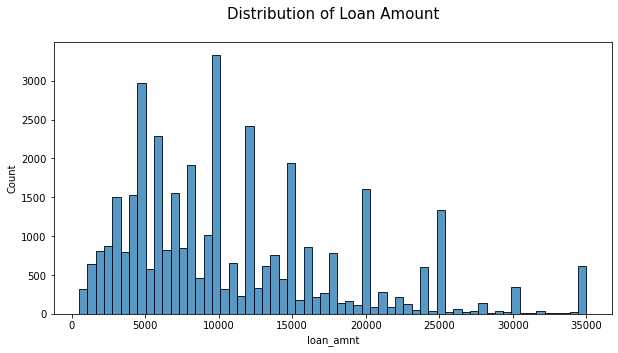

In [501]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_amnt'])
plt.title("Distribution of Loan Amount\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [502]:
df['loan_amnt'].describe()

count   38577.00000
mean    11047.02543
std      7348.44165
min       500.00000
25%      5300.00000
50%      9600.00000
75%     15000.00000
max     35000.00000
Name: loan_amnt, dtype: float64

In [503]:
np.percentile(df['loan_amnt'],[80,85,90,95])

array([16000., 20000., 21600., 25000.])

#### Inference:
    1) Most of the loan amount(about 95%) are less than 25000
    2) 50% of loan amount are less than 9600
    3) 75% of loan amount are less than 15000
    4) The max value of loan amount is 35000
    5) Their seem to be some outliers after loan amount of 25000 which will be analysed via boxplot

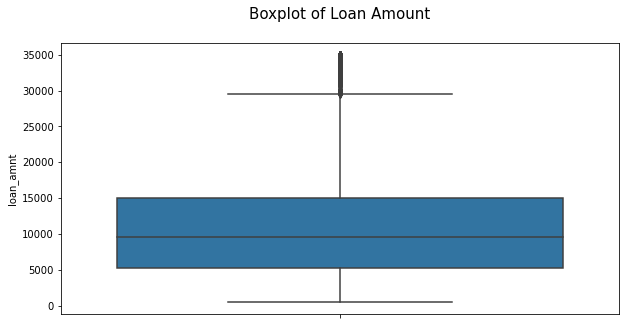

In [504]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='loan_amnt')
plt.title("Boxplot of Loan Amount\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

#### Inference:
    1) Their are definitely outliers as shown in whiskers after loan amount of around 29000

#### Analysing loan Status for loan Amount = 29000 

In [505]:
sum(df['loan_amnt']<=29000),sum(df['loan_amnt']>29000)

(37472, 1105)

In [506]:
(df[df['loan_amnt']<=29000]['loan_status'].value_counts(normalize=True)*100,
df[df['loan_amnt']>29000]['loan_status'].value_counts(normalize=True)*100)

(Fully Paid    85.66396
 Charged Off   14.33604
 Name: loan_status, dtype: float64,
 Fully Paid    76.92308
 Charged Off   23.07692
 Name: loan_status, dtype: float64)

#### Inference:
    1) Their are more than 1000 datapoints(loan amount>29000) outside the whiskers as shown in boxplot 
    2) The percentage of loan defaults cases have increased from 14% to 23% for loan amount > 29000
    3) So loan amounts > 29000 are clearly not outliers but important normal data points which will be used for loan status analysis
    

#### Relation with loan Status

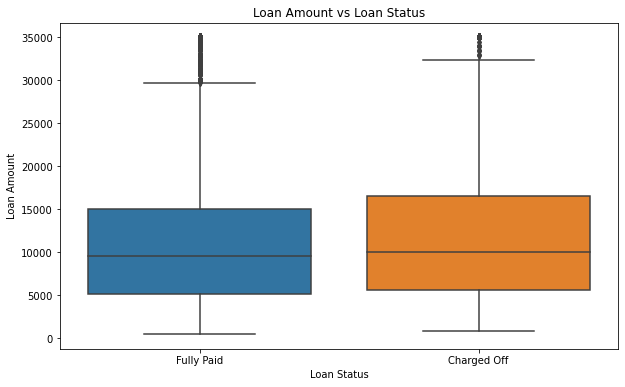

In [507]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=0)
plt.show()

#### Binning loan amount for analysis

In [508]:
df['loan_amnt_groups'] =  pd.cut(df['loan_amnt'], bins= np.arange(df['loan_amnt'].min(),30000+2500,2500),
                                include_lowest=True,right=True,
                                labels=['<3k','3k-5.5k','5.5k-8k','8k-10.5k','10.5k-13k','13k-15.5k','15.5k-18k',
                                       '18k-20.5k','20.5k-23k','23k-25.5k','25.5k-28k','>28k'])

In [509]:
df.groupby('loan_amnt_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100)

loan_status,Fully Paid,Charged Off
loan_amnt_groups,,
<3k,85.71801,14.28199
3k-5.5k,86.52883,13.47117
5.5k-8k,87.41759,12.58241
8k-10.5k,86.75706,13.24294
10.5k-13k,86.78274,13.21726
13k-15.5k,85.25014,14.74986
15.5k-18k,82.28597,17.71403
18k-20.5k,83.37303,16.62697
20.5k-23k,79.06336,20.93664


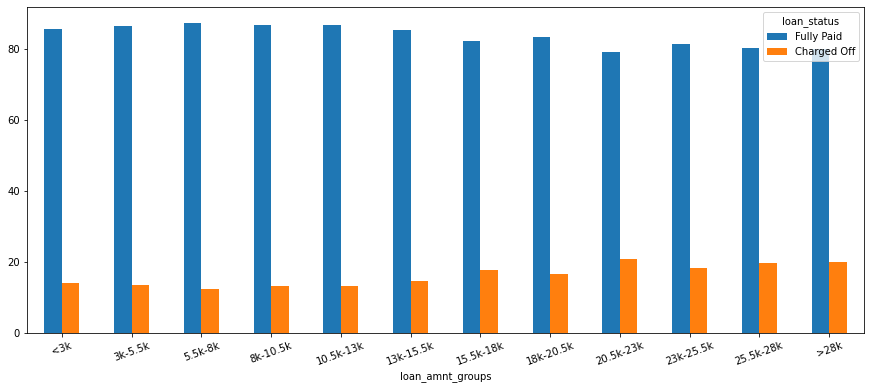

In [510]:
df.groupby('loan_amnt_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).plot.bar(figsize=(15,6))
plt.xticks(rotation=20)
plt.show();

### Inference:
    1) In general we see that with increasing loan amount the probability of defaults increase
    2) The highest default rate is when the loan amount is between 20.5k-23k(~21%), followed by when loan amount is greater than 28k(~20%)

#### Outlier Treatment

In [511]:
df['loan_amnt'] = np.where(df['loan_amnt']>=29000, 29000 ,df['loan_amnt'])

### int_rate

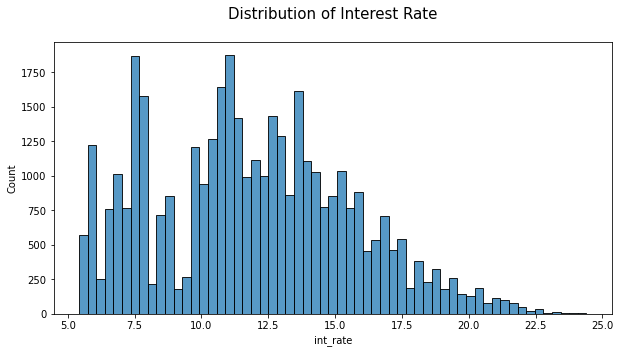

In [512]:
plt.figure(figsize=(10,5))
sns.histplot(df['int_rate'])
plt.title("Distribution of Interest Rate\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [513]:
df['int_rate'].describe()

count   38577.00000
mean       11.93222
std         3.69133
min         5.42000
25%         8.94000
50%        11.71000
75%        14.38000
max        24.40000
Name: int_rate, dtype: float64

In [514]:
np.percentile(df['int_rate'],[80,85,90,95])

array([15.21 , 15.96 , 16.82 , 18.312])

#### Inference:
    1) Most of the interest rate(about 95%) is less than 18.3
    2) 50% of interest rate is less than 11.7
    3) 75% of interest rate is less than 14.38
    4) The max value of interest rate is 24.4
    5) Their seem to be some outliers after interest rate of 22.4 which will be analysed via boxplot

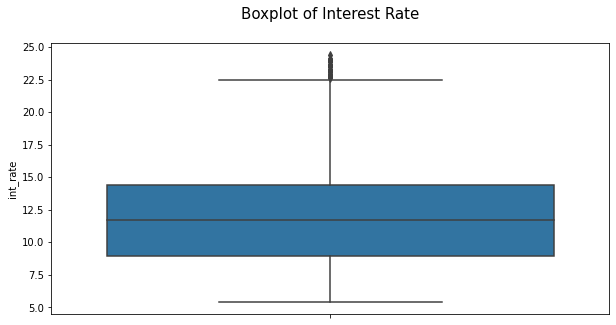

In [515]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='int_rate')
plt.title("Boxplot of Interest Rate\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

#### Inference:
    1) Their are definitely outliers as shown in whiskers after interest rate of around 22.5

#### Analysing loan Status for interest rate = 22.5 

In [516]:
(df[df['int_rate']<=22.5]['loan_status'].value_counts(),
df[df['int_rate']>22.5]['loan_status'].value_counts())

(Fully Paid     32915
 Charged Off     5597
 Name: loan_status, dtype: int64,
 Fully Paid     35
 Charged Off    30
 Name: loan_status, dtype: int64)

In [517]:
(df[df['int_rate']<=22.5]['loan_status'].value_counts(normalize=True)*100,
df[df['int_rate']>22.5]['loan_status'].value_counts(normalize=True)*100)

(Fully Paid    85.46687
 Charged Off   14.53313
 Name: loan_status, dtype: float64,
 Fully Paid    53.84615
 Charged Off   46.15385
 Name: loan_status, dtype: float64)

#### Inference:
    1) Their are 30 datapoints(greater than 22.5) outside the whiskers  
    2) The percentage of loan defaults cases have increased from 14.5% to 46% for interest rate > 22.5

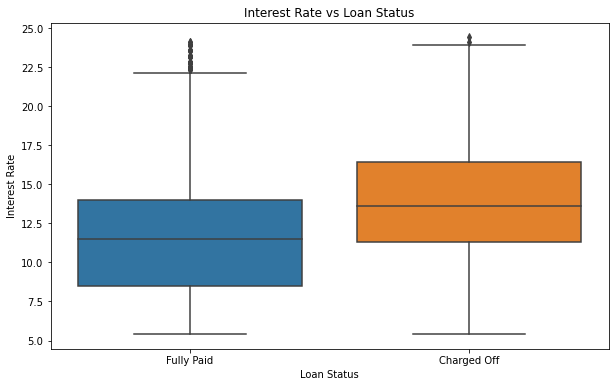

In [518]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=0)
plt.show()

In [519]:
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=[5,7.5,10,12.5,15,17.5,20,22.5,25],
                               include_lowest=True, right=True,
                                labels=['5-7.5','7.5-10','10-12.5','12.5-15','15-17.5','17.5-20','20-22.5','>22.5'])

In [520]:
df.groupby('int_rate_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100)

loan_status,Fully Paid,Charged Off
int_rate_groups,,
5-7.5,95.23277,4.76723
7.5-10,91.73625,8.26375
10-12.5,86.86567,13.13433
12.5-15,83.39899,16.60101
15-17.5,76.96662,23.03338
17.5-20,70.80361,29.19639
20-22.5,62.26950,37.73050
>22.5,53.84615,46.15385


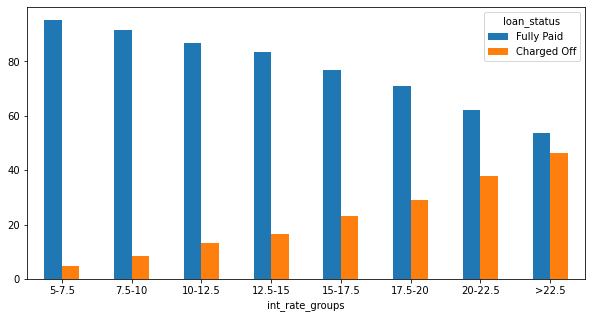

In [521]:
df.groupby('int_rate_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.xticks(rotation=0)
plt.show();

#### Inference:
    1) In general we see that with increasing interest rate the probability of defaults increase
    2) The highest default rate is when the interest rate is greater than 22.5(~46%), followed by when interest rate is 
    between 20-22.5(~38%)
    3) The lowest default rate is when the interest rate is between 5-7.5(~4.8%) followed by when interest rate is
    between 7.5-10(~8.3%) 
    4) Since the outliers(>22.5) follow the general trend and they are less in number so we can merge them with normal
    datapoints using capping at 22.5
    

#### Outlier Treatment

In [522]:
df['int_rate'] = np.where(df['int_rate']>22.5,22.5,df['int_rate'])

### annual_inc

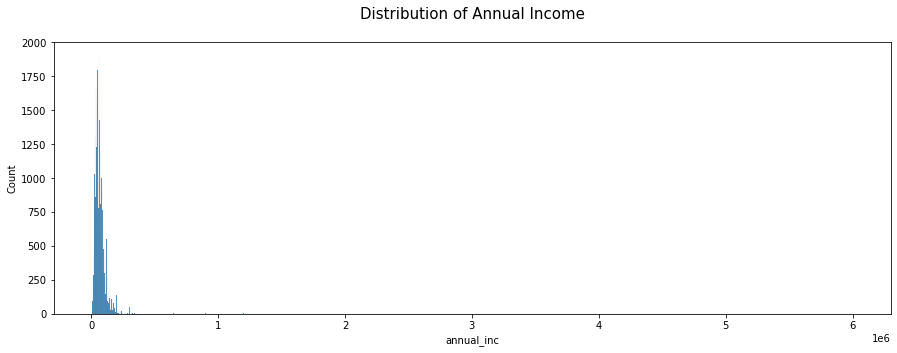

In [523]:
plt.figure(figsize=(15,5))
sns.histplot(df['annual_inc'])
plt.title("Distribution of Annual Income\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [524]:
df['annual_inc'].describe()

count     38577.00000
mean      68777.97368
std       64218.68180
min        4000.00000
25%       40000.00000
50%       58868.00000
75%       82000.00000
max     6000000.00000
Name: annual_inc, dtype: float64

In [525]:
np.percentile(df['annual_inc'],[80,85,90,95,99])

array([ 90000., 100000., 115000., 140004., 234144.])

#### Inference:
    1) Most of the Annual Income(about 95%) are less than 140000
    2) 50% of loan amount are less than 58868
    3) 75% of loan amount are less than 82000
    4) The max value of annual income is 6000000
    4) Their seem to be some outliers after Annual Income of 140000 which will be analysed via boxplot

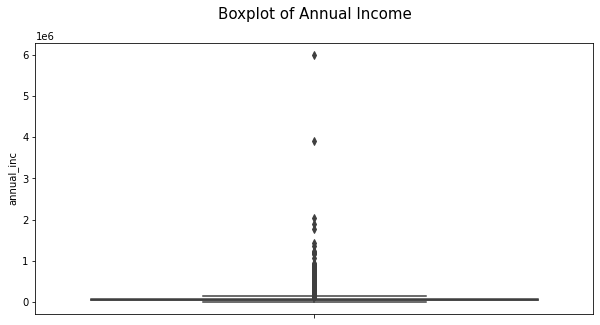

In [526]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='annual_inc')
plt.title("Boxplot of Annual Income\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();


In [527]:
(df[df['annual_inc']<=140000.0]['loan_status'].value_counts(),
df[df['annual_inc']>140000.0]['loan_status'].value_counts())

(Fully Paid     31226
 Charged Off     5416
 Name: loan_status, dtype: int64,
 Fully Paid     1724
 Charged Off     211
 Name: loan_status, dtype: int64)

In [528]:
(df[df['annual_inc']<=140000.0]['loan_status'].value_counts(normalize=True)*100,
df[df['annual_inc']>140000.0]['loan_status'].value_counts(normalize=True)*100)

(Fully Paid    85.21915
 Charged Off   14.78085
 Name: loan_status, dtype: float64,
 Fully Paid    89.09561
 Charged Off   10.90439
 Name: loan_status, dtype: float64)

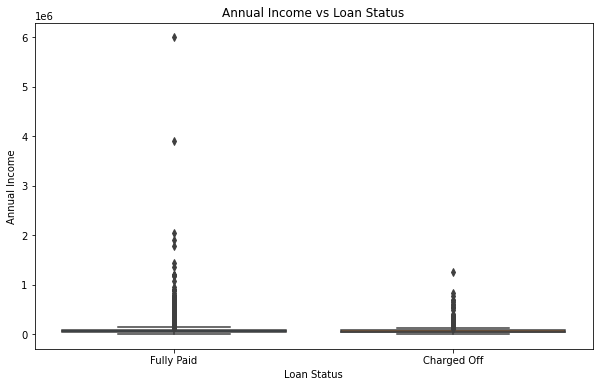

In [529]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=0)
plt.show()

In [530]:
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=np.arange(df['annual_inc'].min(),160000,15000),
                                 include_lowest=True,right=True,
                                 labels=['4k-19k','19k-34k','34k-49k','49k-64k','64k-79k','79k-94k','94k-109k','109k-124k',
                                        '124k-139k','>139k'])


In [531]:
df.groupby('annual_inc_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100)

loan_status,Fully Paid,Charged Off
annual_inc_groups,,
4k-19k,77.85088,22.14912
19k-34k,82.42352,17.57648
34k-49k,83.79713,16.20287
49k-64k,84.66842,15.33158
64k-79k,86.57293,13.42707
79k-94k,87.71789,12.28211
94k-109k,89.33501,10.66499
109k-124k,89.00191,10.99809
124k-139k,88.76529,11.23471


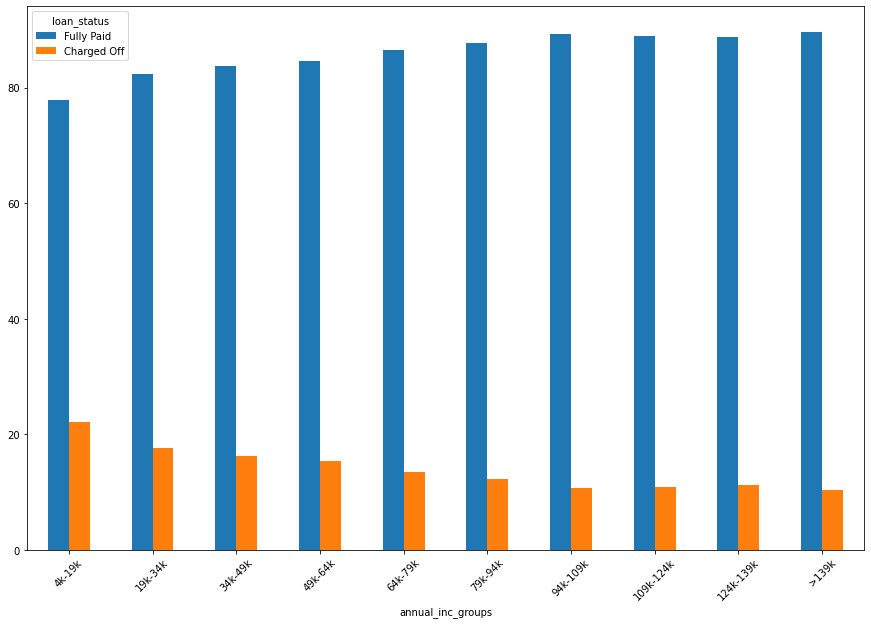

In [532]:
df.groupby('annual_inc_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show();

#### Inference:
    1) In general we see that with increasing annual income the probability of defaults decrease
    2) The highest default rate is when the annual income is between 4k-19k(~22%), followed by when annual income
    is between 19k-34k(~17.6%)
    3) The lowest default rate is when the annual income is greater than 139k(~10.4%)
    4) Since the outliers(>140k) follow the general trend and they are less in number so we can merge them with normal
    datapoints using capping at 140k
    

#### Outlier Treatment

In [533]:
df['annual_inc'] = np.where(df['annual_inc']>140000,140000,df['annual_inc'])

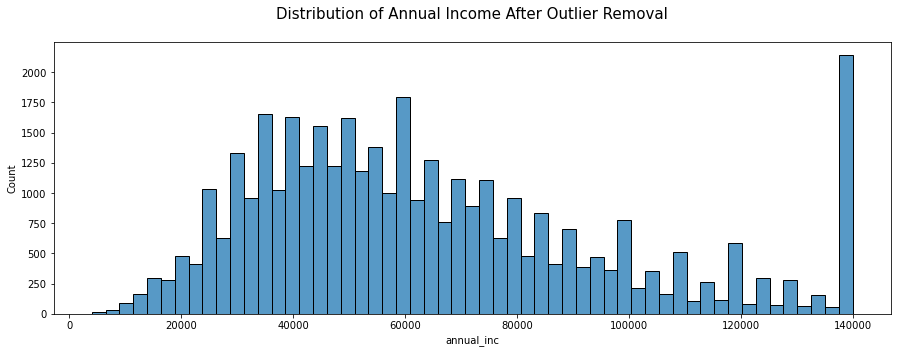

In [534]:
plt.figure(figsize=(15,5))
sns.histplot(df['annual_inc'])
plt.title("Distribution of Annual Income After Outlier Removal\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

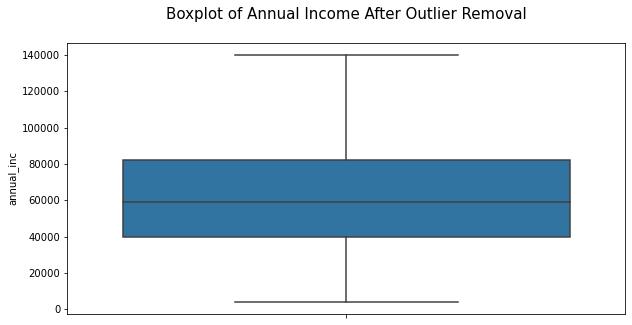

In [535]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='annual_inc')
plt.title("Boxplot of Annual Income After Outlier Removal\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

### dti

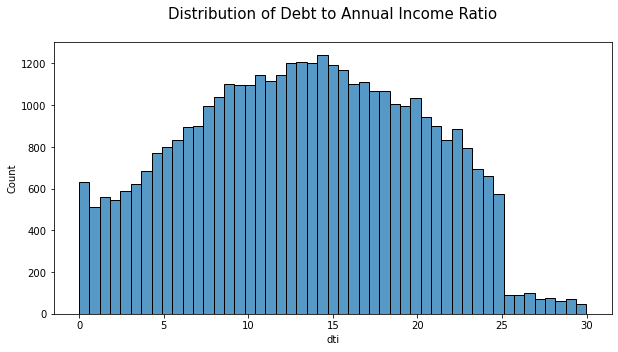

In [536]:
plt.figure(figsize=(10,5))
sns.histplot(df['dti'])
plt.title("Distribution of Debt to Annual Income Ratio\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [537]:
df['dti'].describe()

count   38577.00000
mean       13.27273
std         6.67304
min         0.00000
25%         8.13000
50%        13.37000
75%        18.56000
max        29.99000
Name: dti, dtype: float64

In [538]:
np.percentile(df['dti'],[85,90,95])

array([20.92, 22.29, 23.8 ])

#### Inference:
    1) Most of the dti points(about 95%) are less than 22.3
    2) 50% of dti points are less than 13.37
    3) 75% of dti points are less than 18.56
    4) The max value of dti is 29.99
    5) Their seem to be no outliers but it can also be analysed via boxplot

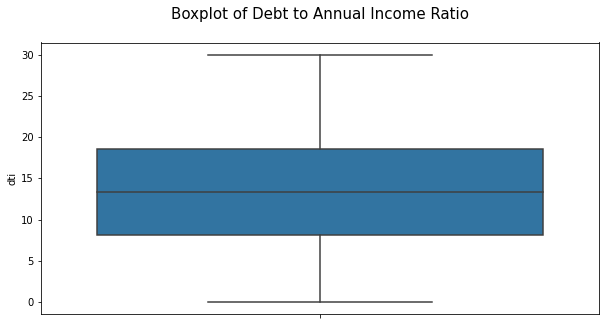

In [539]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='dti')
plt.title("Boxplot of Debt to Annual Income Ratio\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

#### Inference:
    1) Their are no outliers in dti column

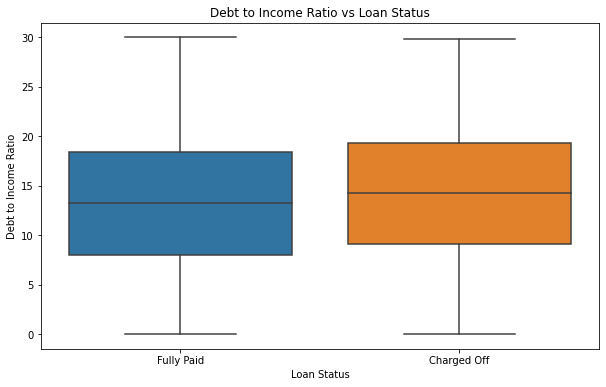

In [540]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('Debt to Income Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.show()

In [541]:
df['dti_groups'] =pd.cut(df['dti'], bins=np.arange(df['dti'].min(),35,5),
                                include_lowest=True,right=True,
                                labels=['0-5','5-10','10-15','15-20','20-25','>25'])


In [542]:
df['dti_groups'].value_counts()

10-15    9630
15-20    8811
5-10     7873
20-25    6578
0-5      5062
>25       623
Name: dti_groups, dtype: int64

In [543]:
df.groupby('dti_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100)

loan_status,Fully Paid,Charged Off
dti_groups,,
0-5,87.63335,12.36665
5-10,87.23485,12.76515
10-15,85.44133,14.55867
15-20,84.23561,15.76439
20-25,83.00395,16.99605
>25,86.03531,13.96469


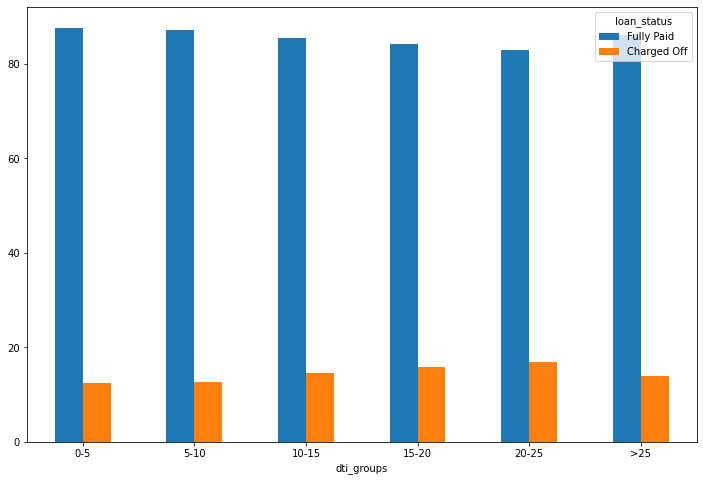

In [544]:
df.groupby('dti_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).plot.bar(figsize=(12,8))
plt.xticks(rotation=0)
plt.show();

#### Inference:
	1) In general we see that with increasing dti the probability of defaults decrease with exception of dti greater than 25 but this could a random variation.
	2) The highest default rate is when the dti is between 20-25(~17%), followed by when dti
	is between 15-20(~16%)
	3) The lowest default rate is when the dti is less than 5(~12.4%)

### revol_util

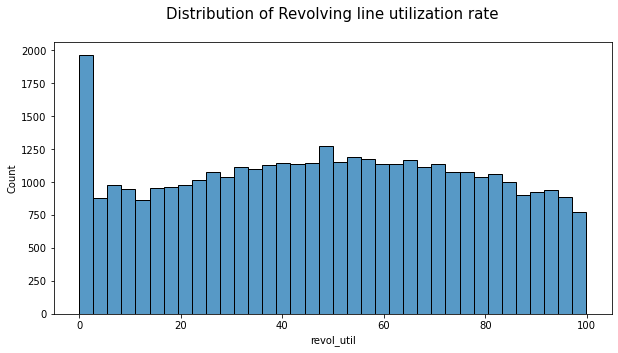

In [545]:
plt.figure(figsize=(10,5))
sns.histplot(df['revol_util'])
plt.title("Distribution of Revolving line utilization rate\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [546]:
df['revol_util'].describe()

count   38577.00000
mean       48.70329
std        28.34636
min         0.00000
25%        25.20000
50%        49.10000
75%        72.20000
max        99.90000
Name: revol_util, dtype: float64

In [547]:
np.percentile(df['revol_util'],[80,85,95,99])

array([77.2, 82.3, 93.5, 98.5])

#### Inference:
    1) Most of the revol_util(about 95%) are less than 93.5
    2) 50% of revol_util are less than 49.1
    3) 75% of revol_util are less than 72.2
	4) The max value of revol_util is 99.9
    5) Their seem to be no outliers but the same will be analysed via boxplot
	

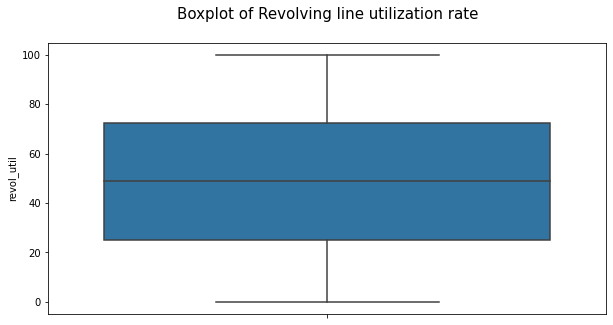

In [548]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='revol_util')
plt.title("Boxplot of Revolving line utilization rate\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

#### Inference:
            1) Their are no outliers in revol_util column 

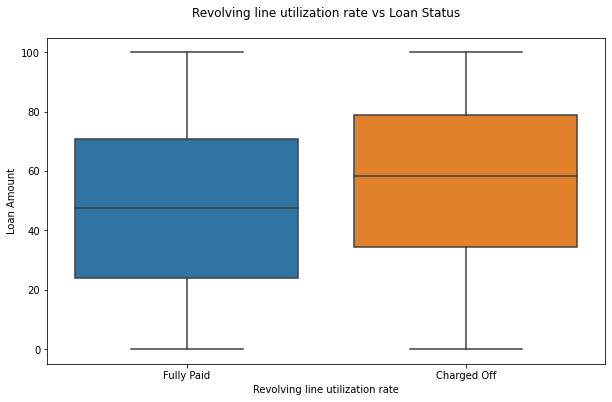

In [549]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=df)
plt.title('Revolving line utilization rate vs Loan Status\n')
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Loan Amount')
plt.show()

In [550]:
df['revol_util_groups'] = pd.cut(df['revol_util'], bins=np.arange(df['revol_util'].min(),110,10),
                                 include_lowest=True,right=True,
                                 labels=['<=10','10-20','20-30','30-40','40k-50','50-60','60-70','70-80','80-90','>90'])

In [551]:
df.groupby('revol_util_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100)

loan_status,Fully Paid,Charged Off
revol_util_groups,,
<=10,90.14656,9.85344
10-20,89.98496,10.01504
20-30,88.82289,11.17711
30-40,87.47813,12.52187
40k-50,85.44689,14.55311
50-60,84.94264,15.05736
60-70,83.99320,16.00680
70-80,82.11445,17.88555
80-90,80.98177,19.01823


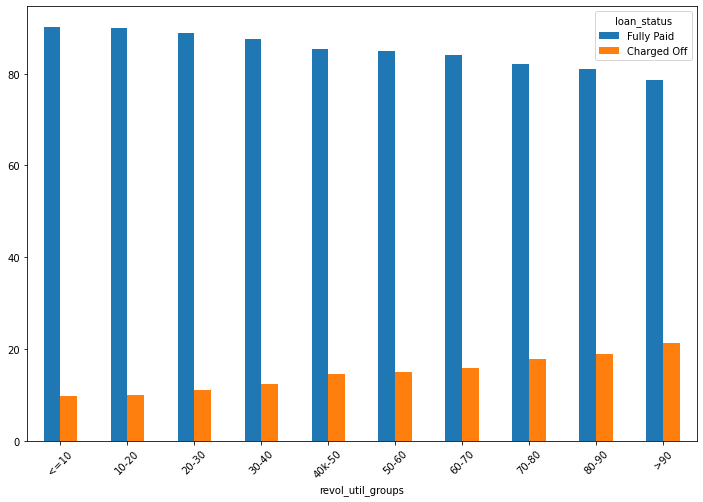

In [552]:
df.groupby('revol_util_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).plot.bar(figsize=(12,8))
plt.xticks(rotation=45)
plt.show();

### Inference:
	1) In general we see that with increasing revol_util rate the probability of defaults increase
	2) The highest default rate is when revol_util is greater than >90(~21%), followed by when revol_util
	is between 80-90(~19%)
	3) The lowest default rate is when revol_util is less than 10(~9.8%)

### total_acc

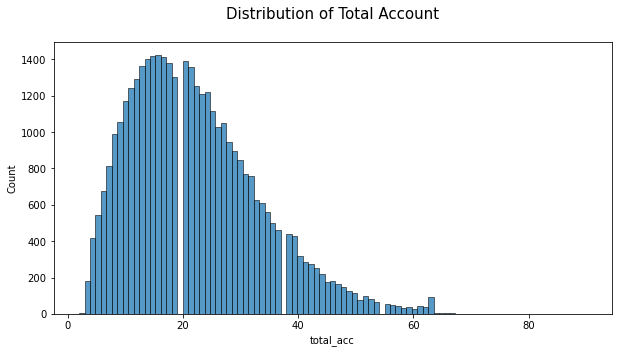

In [553]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_acc'])
plt.title("Distribution of Total Account\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [554]:
df['total_acc'].describe()

count   38577.00000
mean       22.05265
std        11.42586
min         2.00000
25%        13.00000
50%        20.00000
75%        29.00000
max        90.00000
Name: total_acc, dtype: float64

In [555]:
np.percentile(df['total_acc'],[80,85,90,95,98])

array([31., 34., 38., 43., 51.])

#### Inference:
    1) Most of the credit lines(about 95%) are less than 43
    2) 50% of credit lines are less than 20
    3) 75% of credit lines are less than 29
	4) The max value of credit lines is 90
    5) Their seem to be some outliers after credit lines value of 53 which will be analysed via boxplot

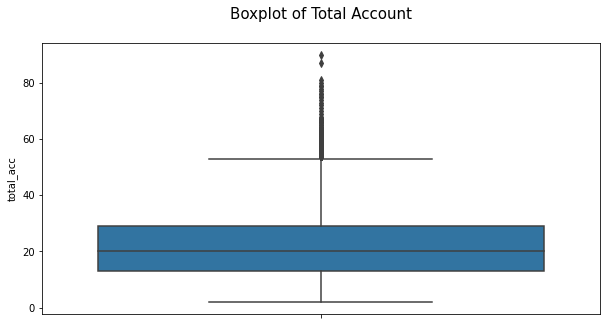

In [556]:
plt.figure(figsize=(10,5))
sns.boxplot(data= df, y='total_acc')
plt.title("Boxplot of Total Account\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.show();

In [557]:
(df[df['total_acc']<=53]['loan_status'].value_counts(),
df[df['total_acc']>53]['loan_status'].value_counts())

(Fully Paid     32507
 Charged Off     5557
 Name: loan_status, dtype: int64,
 Fully Paid     443
 Charged Off     70
 Name: loan_status, dtype: int64)

In [558]:
(df[df['total_acc']<=53]['loan_status'].value_counts(normalize=True)*100,
df[df['total_acc']>53]['loan_status'].value_counts(normalize=True)*100)

(Fully Paid    85.40090
 Charged Off   14.59910
 Name: loan_status, dtype: float64,
 Fully Paid    86.35478
 Charged Off   13.64522
 Name: loan_status, dtype: float64)

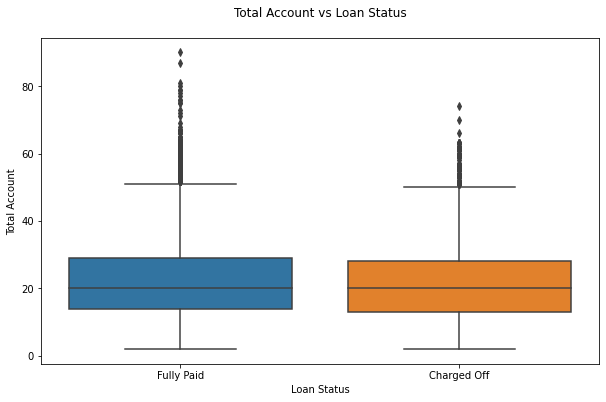

In [559]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='total_acc', data=df)
plt.title('Total Account vs Loan Status\n')
plt.xlabel('Loan Status')
plt.ylabel('Total Account')
plt.show()

In [560]:
df['total_acc_groups'] = pd.cut(df['total_acc'], bins= np.arange(df['total_acc'].min(),60,5),
                                include_lowest=True,right=True,
                                labels=['2-7','7-12','12-17','17-22','22-27','27-32','32-37','37-42','42-47','47-52','>52'])

In [561]:
df.groupby('total_acc_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100)

loan_status,Fully Paid,Charged Off
total_acc_groups,,
2-7,82.80061,17.19939
7-12,83.99722,16.00278
12-17,85.00427,14.99573
17-22,86.40036,13.59964
22-27,86.64889,13.35111
27-32,86.20608,13.79392
32-37,85.26430,14.73570
37-42,85.11494,14.88506
42-47,84.42211,15.57789


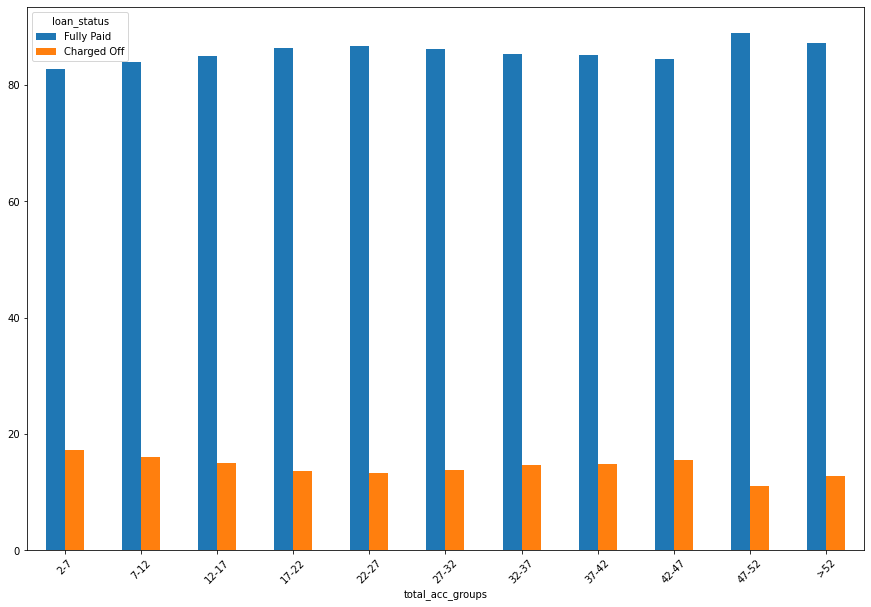

In [562]:
df.groupby('total_acc_groups').apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).plot.bar(figsize=(15,10))
plt.xticks(rotation=45)
plt.show();

#### Inference:
    1) Their seems to be no general relationship of total_account with loan status
    2) Increasing total_account first decreases default rate then after a certain number of total account the default rate
    starts to increase
    3) The highest default rate is when total account is between 2-7(~17%)
    4) The lowest default rate is when total account is between 47-52(~11%)

#### Outlier Treatment

In [563]:
df['total_acc'] = np.where(df['total_acc']>53, 53, df['total_acc'])

### Categorical

#### Utility Functions

In [564]:
def plot_countplot(col,figsize):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)

    print(df[col].value_counts() ,'\n\n',df[col].value_counts(normalize=True)*100)

    sns.countplot(data=df, x=col,ax=ax[0])
    ax[0].set_title(f"Count of {col} Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

    sns.barplot(x= df[col].value_counts().index, y=(df[col].value_counts(normalize=True)*100).values,ax=ax[1])
    ax[1].set_title(f"Percentage of {col} Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'});
    
    return fig,ax 

In [565]:
def relation_with_target(col,figsize):
    x = df.groupby(col).apply(lambda x:x['loan_status'].value_counts(normalize=True)*100).sort_values(by=col)
    print(x)
    x.plot.bar(figsize=figsize)
    plt.title(f"Percentage of Loan Status Categories within {col} Individual Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
    plt.xticks(rotation=0);

### term

36    29096
60     9481
Name: term, dtype: int64 

 36   75.42318
60   24.57682
Name: term, dtype: float64


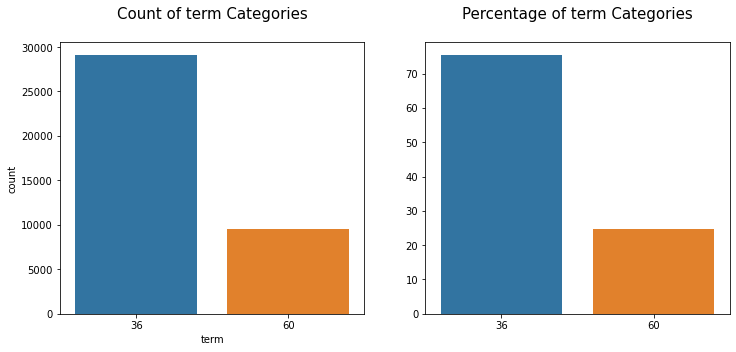

In [566]:
fig,ax = plot_countplot('term',figsize=(12, 5))

#### Inference:
    1) Term column consists of 2 unique categories, 36 and 60 namely
    2) The counts of 36 and 60 is 29096 and 9481 respectively.
    3) 36 is 75% and 60 is 25% of datapoints

loan_status  Fully Paid  Charged Off
term                                
36             88.90913     11.09087
60             74.68621     25.31379


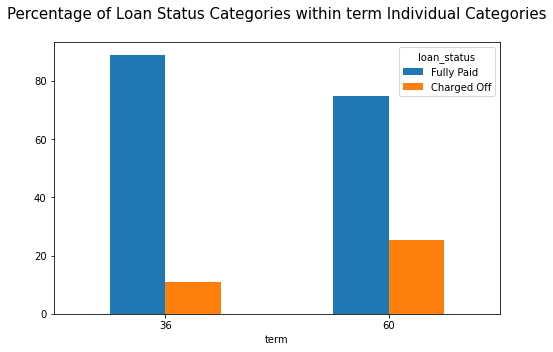

In [567]:
relation_with_target('term',figsize=(8,5))

#### Inference:
    1) The probability of default is more high for a loan given for 60 months than for 36 months
    2) For 36 months the default rate is 11% and for 60 months its 25%

#### grade

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64 

 B   30.26415
A   26.03883
C   20.30744
D   13.18143
E    6.90308
F    2.53000
G    0.77507
Name: grade, dtype: float64


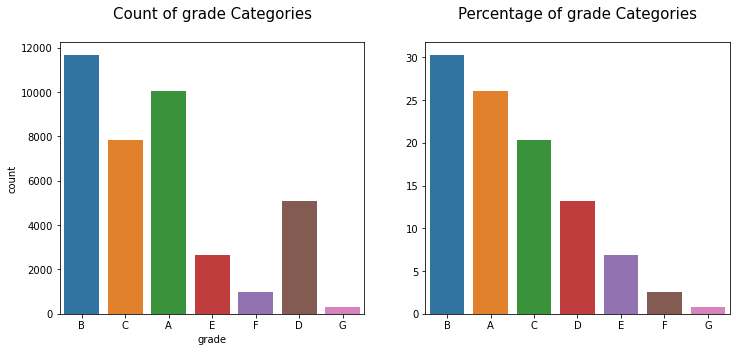

In [568]:
fig,ax = plot_countplot('grade',figsize=(12, 5))

#### Inference:
    1) Grade column consists of 7 unique categories, A,B,C,D,E,F,G namely
    2) The count of B is highest with 11675(~30%) datapoints, followed by A with count a of 10045(~26%).
    3) G is the lowest category in terms of count of datapoints; i.e 299(~0.8%) 

loan_status  Fully Paid  Charged Off
grade                               
A              94.00697      5.99303
B              87.79443     12.20557
C              82.80572     17.19428
D              78.01377     21.98623
E              73.15058     26.84942
F              67.31557     32.68443
G              66.22074     33.77926


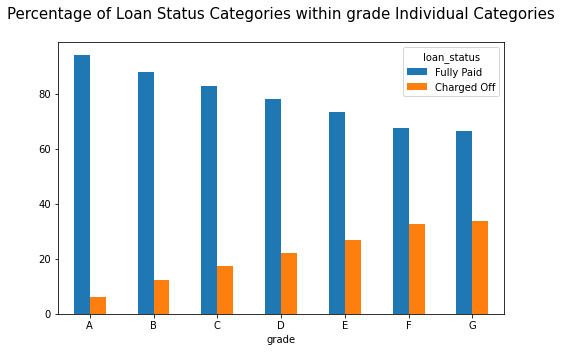

In [569]:
relation_with_target('grade',figsize=(8,5))

#### Inference:
    1) The probability of default increases as we move in alphabetical order of grades; i.e the probability of default is
    more in G grade (~34%), less in F(~33%), more less in E(~27%) and same pattern follows till A(~6%)
    2) Their is a order associated with grades

#### sub_grade

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64 

 A4   7.44744
B3   7.32302
A5   7.03787
B5   6.77865
B4   6.31724
C1   5.32701
B2   5.18703
C2   5.00557
A3   4.69191
B1   4.65822
A2   3.90906
C3   3.85722
D2   3.33359
C4   3.12622
C5   2.99142
A1   2.95254
D3   2.89292
D1   2.41336
D4   2.37966
D5   2.16191
E1   1.87158
E2   1.59162
E3   1.33758
E4   1.09910
E5   1.00319
F1   0.79063
F2   0.60399
F3   0.45105
F4   0.39142
F5   0.29292
G1   0.24367
G2   0.19960
G4   0.13998
G3   0.11665
G5   0.07517
Name: sub_grade, dtype: float64


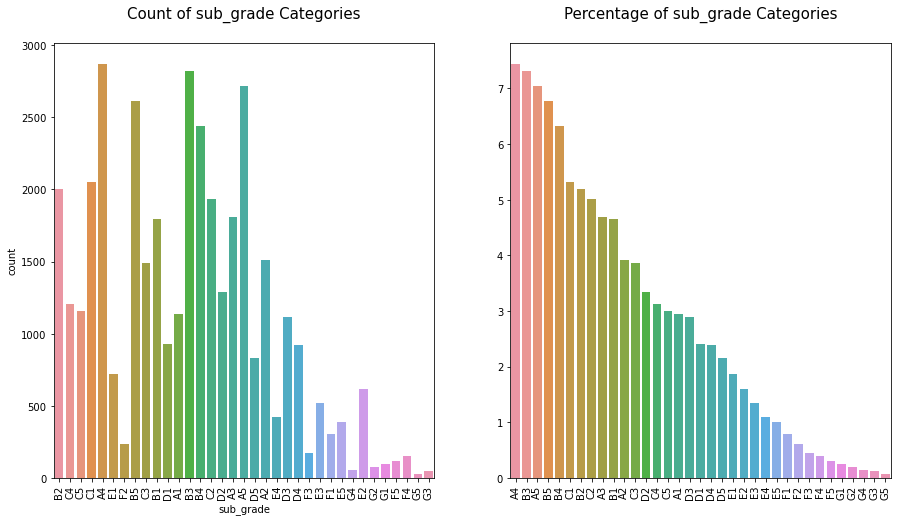

In [570]:
fig,ax = plot_countplot('sub_grade',figsize=(15, 8))
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)

#### Inference:
    1) Sub-Grade column consists of 35 unique categories, A grade has 5 unique sub grades A1, A2, A3, A4, A5 and same
    pattern follows for other 6 grades as well.
    2) The count of A4 is highest with 2873(~7.4%) datapoints, followed by B3 with count a of 2825(~7.3%).
    3) G5 is the lowest category in terms of count of datapoints; i.e 29(~0.08%) 

loan_status  Fully Paid  Charged Off
sub_grade                           
A1             97.36611      2.63389
A2             95.09284      4.90716
A3             94.30939      5.69061
A4             93.80439      6.19561
A5             92.00737      7.99263
B1             90.48414      9.51586
B2             88.60570     11.39430
B3             87.92920     12.07080
B4             86.49979     13.50021
B5             86.38623     13.61377
C1             83.64964     16.35036
C2             83.37649     16.62351
C3             81.85484     18.14516
C4             82.42123     17.57877
C5             81.97574     18.02426
D1             82.06230     17.93770
D2             78.92691     21.07309
D3             77.06093     22.93907
D4             76.57952     23.42048
D5             74.94005     25.05995
E1             72.57618     27.42382
E2             73.45277     26.54723
E3             76.93798     23.06202
E4             70.28302     29.71698
E5             71.83463     28.16537
F

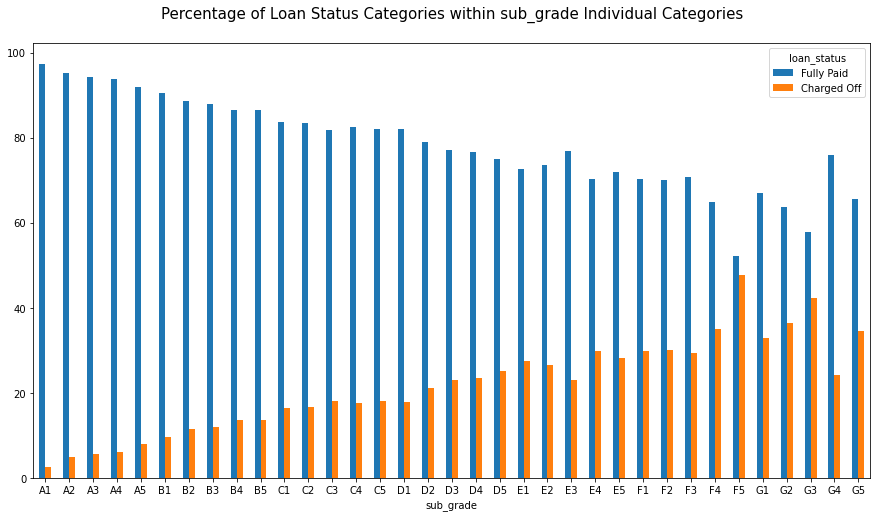

In [571]:
relation_with_target('sub_grade',figsize=(15,8));

#### Inference:
    1) Sub Grade column follows the same pattern as that of grade with loan status column leaving a few exceptions; i.e the A sub grades default rate is lower than of B, B sub grades have a default rate less than of C and same pattern follows 
    till G sub grades
    2) Within each grade the the default rate increases with alphabetical order,eg; within A grade the default rate of A1 
    is less than of A2, A2 is less than of A3, A3 is less than of A4 and A4 is less than of A5.
    3) The default rate of F5 is highest(~48%) and that of A1 is lowest(~2.6%) among all sub-grades

#### emp_title

In [572]:
df['emp_title'].value_counts()

unknown_emp_title              2386
US Army                         131
Bank of America                 107
IBM                              65
AT&T                             57
                               ... 
Interface EAP                     1
ICON Clinical Research            1
Olgoonik Technical Services       1
Pro Weld Inc.                     1
21 Fellowship, SBC                1
Name: emp_title, Length: 28028, dtype: int64

In [573]:
x = df['emp_title'].value_counts()

In [574]:
rare_emp_title_1st_list = x[(x>20) & (x<=30)].index
rare_emp_title_1st_list

Index(['us army', 'Accenture', 'Best Buy', 'Fidelity Investments', 'Comcast', 'Home Depot', 'Social Security Administration', 'United States Postal Service', 'US Postal Service', 'Wells Fargo Bank', 'United Parcel Service', 'self', 'walmart', 'General Electric', 'Morgan Stanley', 'Sprint', 'Citigroup', 'Columbia University', 'American Express', 'Retired', 'Merrill Lynch'], dtype='object')

In [575]:
rare_emp_title_2nd_list = x[(x>10) & (x<=20)].index
rare_emp_title_2nd_list

Index(['Department of Homeland Security', 'Raytheon', 'PricewaterhouseCoopers', 'Department of Veterans Affairs', 'Internal Revenue Service', 'US Government', 'SAIC', 'usps', 'General Dynamics', 'ADP', 'United States Marine Corps', 'The Home Depot', 'BAE Systems', 'United States Navy', 'Thomson Reuters', 'The Boeing Company', 'Nordstrom', 'Microsoft', 'The Hartford', 'American Airlines', 'US Bank', 'Union Bank', 'CSC', 'Citibank', 'Wal-Mart', 'verizon wireless', 'Self-employed', 'Morgan Stanley Smith Barney', 'walgreens', 'Department of Justice', 'T-Mobile', 'Macy's', 'USMC', 'Military', 'U.S. Air Force', 'Hewlett Packard', 'Boeing', 'us postal service', 'at&t', 'Time Warner Cable', 'Cisco Systems', 'Whole Foods Market', 'Southwest Airlines', 'United Airlines', 'Costco Wholesale', 'NYC Department of Education', 'bank of america', 'Army', 'Pfizer', 'Fifth Third Bank', 'Federal Aviation Administration', 'Self-Employed', 'Oracle', 'Bank of America Corp.', 'Deutsche Bank',
       'General 

In [576]:
extreme_rare_emp_title = x[x<=10].index
len(extreme_rare_emp_title)

27895

In [577]:
df['emp_title'] = np.where(df['emp_title'].isin(rare_emp_title_1st_list),'rare_emp_title_1st_list',
        (np.where(df['emp_title'].isin(rare_emp_title_2nd_list),'rare_emp_title_2nd_list',df['emp_title'])))

df['emp_title'] = np.where(df['emp_title'].isin(extreme_rare_emp_title),'extreme_rare_emp_title',df['emp_title'])

In [578]:
sorted(df['emp_title'].unique())

['AT&T',
 'Bank of America',
 'Booz Allen Hamilton',
 'Department of Defense',
 'IBM',
 'JP Morgan Chase',
 'JPMorgan Chase',
 'Kaiser Permanente',
 'Lockheed Martin',
 'Northrop Grumman',
 'Self',
 'Self Employed',
 'State of California',
 'Target',
 'U.S. Army',
 'UPS',
 'US ARMY',
 'US Air Force',
 'US Army',
 'US Navy',
 'USAF',
 'USPS',
 'United States Air Force',
 'United States Army',
 'Verizon',
 'Verizon Wireless',
 'Walgreens',
 'Walmart',
 'Wells Fargo',
 'extreme_rare_emp_title',
 'rare_emp_title_1st_list',
 'rare_emp_title_2nd_list',
 'unknown_emp_title']

In [579]:
df['emp_title'] = np.where(df['emp_title'].isin(['JP Morgan Chase','JPMorgan Chase']),'JP Morgan Chase',df['emp_title'])
df['emp_title'] = np.where(df['emp_title'].isin(['Self Employed','Self']),'Self Employed',df['emp_title'])
df['emp_title'] = np.where(df['emp_title'].isin(['U.S. Army','US Army','United States Army']),'US Army',df['emp_title'])
df['emp_title'] = np.where(df['emp_title'].isin(['U.S. Army','US Army','United States Army','US Army']),'US Army',df['emp_title'])
df['emp_title'] = np.where(df['emp_title'].isin(['UPS','USPS']),'USPS',df['emp_title'])
df['emp_title'] = np.where(df['emp_title'].isin(['US Air Force','United States Air Force']),'US Air Force',df['emp_title'])

In [580]:
df['emp_title'].value_counts()

extreme_rare_emp_title     33161
unknown_emp_title           2386
rare_emp_title_2nd_list     1145
rare_emp_title_1st_list      520
US Army                      204
Bank of America              107
US Air Force                  93
USPS                          91
Self Employed                 75
JP Morgan Chase               70
IBM                           65
AT&T                          57
Kaiser Permanente             56
USAF                          52
Wells Fargo                   52
Walmart                       45
Lockheed Martin               42
Verizon Wireless              40
US ARMY                       38
State of California           37
Walgreens                     37
Target                        35
Department of Defense         35
US Navy                       34
Booz Allen Hamilton           34
Northrop Grumman              34
Verizon                       32
Name: emp_title, dtype: int64

extreme_rare_emp_title     33161
unknown_emp_title           2386
rare_emp_title_2nd_list     1145
rare_emp_title_1st_list      520
US Army                      204
Bank of America              107
US Air Force                  93
USPS                          91
Self Employed                 75
JP Morgan Chase               70
IBM                           65
AT&T                          57
Kaiser Permanente             56
USAF                          52
Wells Fargo                   52
Walmart                       45
Lockheed Martin               42
Verizon Wireless              40
US ARMY                       38
State of California           37
Walgreens                     37
Target                        35
Department of Defense         35
US Navy                       34
Booz Allen Hamilton           34
Northrop Grumman              34
Verizon                       32
Name: emp_title, dtype: int64 

 extreme_rare_emp_title    85.96055
unknown_emp_title          6.18503
rare_e

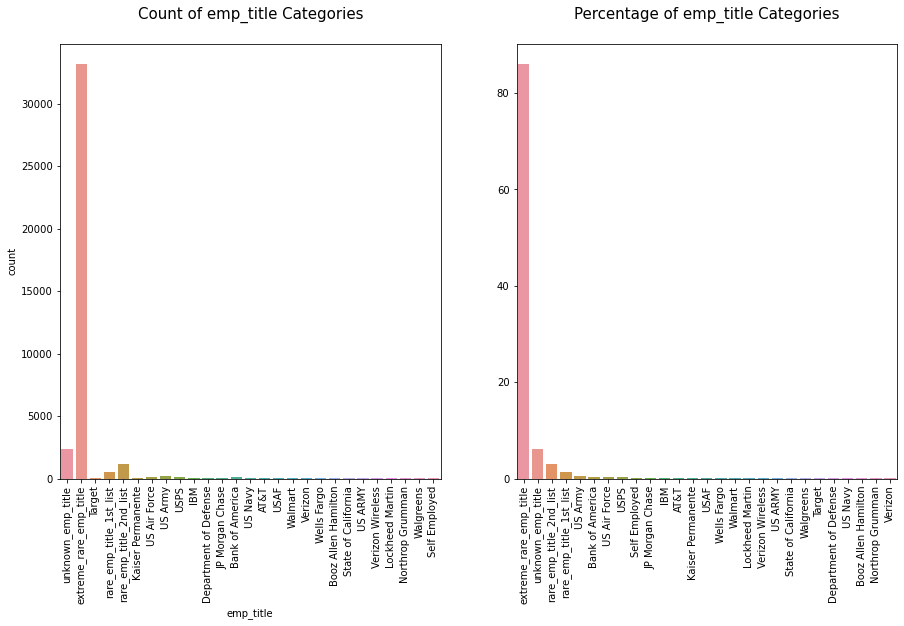

In [581]:
fig, ax =plot_countplot('emp_title',figsize=(15,8))
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)

loan_status              Fully Paid  Charged Off
emp_title                                       
AT&T                       78.94737     21.05263
Bank of America            81.30841     18.69159
Booz Allen Hamilton        88.23529     11.76471
Department of Defense      88.57143     11.42857
IBM                        86.15385     13.84615
JP Morgan Chase            90.00000     10.00000
Kaiser Permanente          85.71429     14.28571
Lockheed Martin            95.23810      4.76190
Northrop Grumman           82.35294     17.64706
Self Employed              89.33333     10.66667
State of California        89.18919     10.81081
Target                     80.00000     20.00000
US ARMY                    86.84211     13.15789
US Air Force               88.17204     11.82796
US Army                    85.78431     14.21569
US Navy                    91.17647      8.82353
USAF                       96.15385      3.84615
USPS                       79.12088     20.87912
Verizon             

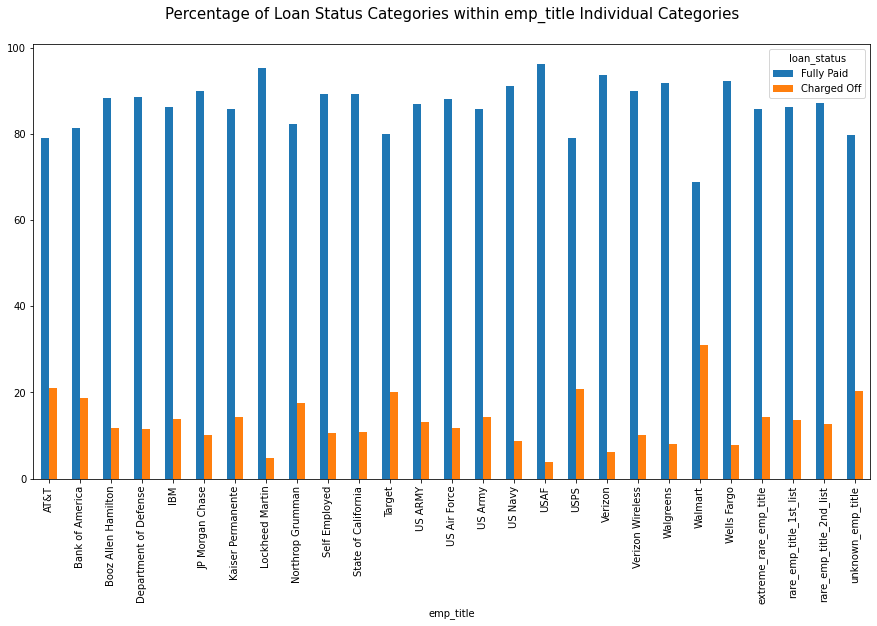

In [582]:
relation_with_target('emp_title',figsize=(15,8))
plt.xticks(rotation=90);

#### emp_length

10+                   8488
< 1                   4508
2                     4291
3                     4012
4                     3342
5                     3194
1                     3169
6                     2168
7                     1711
8                     1435
9                     1226
unknown_emp_length    1033
Name: emp_length, dtype: int64 

 10+                  22.00275
< 1                  11.68572
2                    11.12321
3                    10.39998
4                     8.66319
5                     8.27954
1                     8.21474
6                     5.61993
7                     4.43529
8                     3.71983
9                     3.17806
unknown_emp_length    2.67776
Name: emp_length, dtype: float64


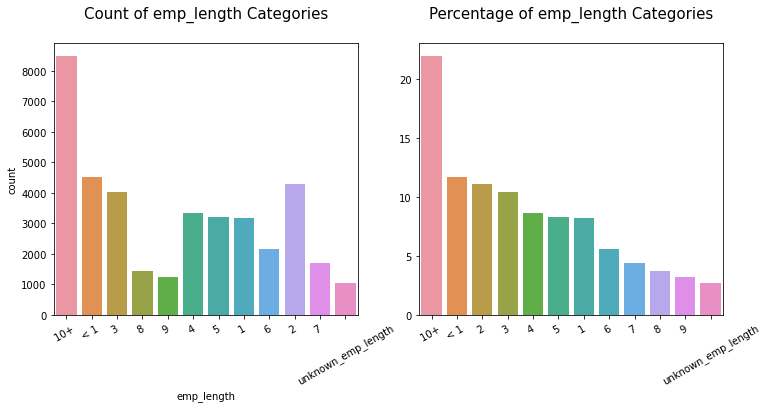

In [583]:
fig ,ax =plot_countplot('emp_length',figsize=(12,5))
ax[0].tick_params(axis='x', labelrotation=30)
ax[1].tick_params(axis='x', labelrotation=30)

#### Inference:
    1) Employee Length column consists of 11 unique categories, < 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10+ namely
    2) The count of 10+ is highest with 8488(~22%) datapoints, followed by <1 with count a of 4508(~11.7%).
    3) unknown_emp_length is the lowest category in terms of count of datapoints; i.e 1033(~2.7%) 

loan_status         Fully Paid  Charged Off
emp_length                                 
1                     85.61060     14.38940
10+                   84.31904     15.68096
2                     86.78630     13.21370
3                     86.16650     13.83350
4                     86.17594     13.82406
5                     85.66061     14.33939
6                     85.83948     14.16052
7                     84.62887     15.37113
8                     85.85366     14.14634
9                     87.11256     12.88744
< 1                   85.82520     14.17480
unknown_emp_length    77.92836     22.07164


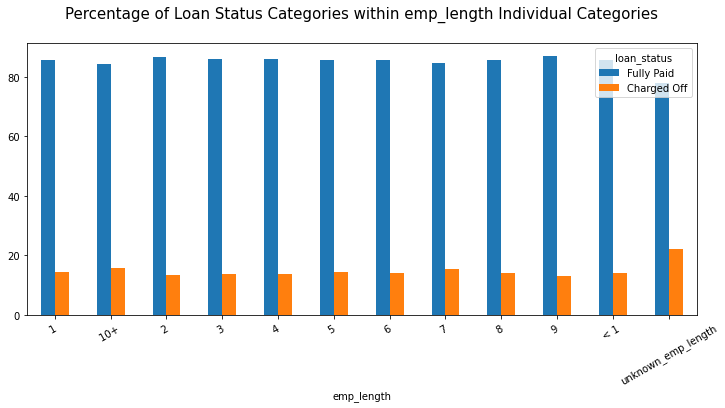

In [584]:
relation_with_target('emp_length',figsize=(12,5))
plt.xticks(rotation=30);

#### Inference:
    1) Their is no general pattern of employee length with loan status.
    1) Borrowers whose employee length is unknown are most risky as their default rate is highest(~22%)

#### home_ownership

In [585]:
df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

#### Outlier Treatment

#### Replacing None category with mode of home_ownership column as the category is very less in number

In [586]:
df['home_ownership'] = np.where(df['home_ownership']=='NONE',df['home_ownership'].mode()[0],df['home_ownership'])

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64 

 RENT       47.91197
MORTGAGE   44.12215
OWN         7.71185
OTHER       0.25404
Name: home_ownership, dtype: float64


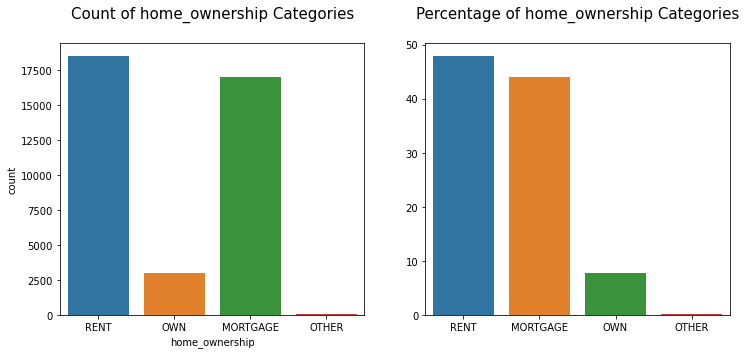

In [587]:
plot_countplot('home_ownership',figsize=(12,5));

#### Inference:
         1) 'Rent' type of home_ownership has maximum datapoints 18483(~48%), followed by MORTGAGE 17021 datapoints(~44%)
         2) 'OTHER' type of home_ownership has least datapoints 98(~0.25%)

loan_status     Fully Paid  Charged Off
home_ownership                         
MORTGAGE          86.32865     13.67135
OTHER             81.63265     18.36735
OWN               85.10924     14.89076
RENT              84.63994     15.36006


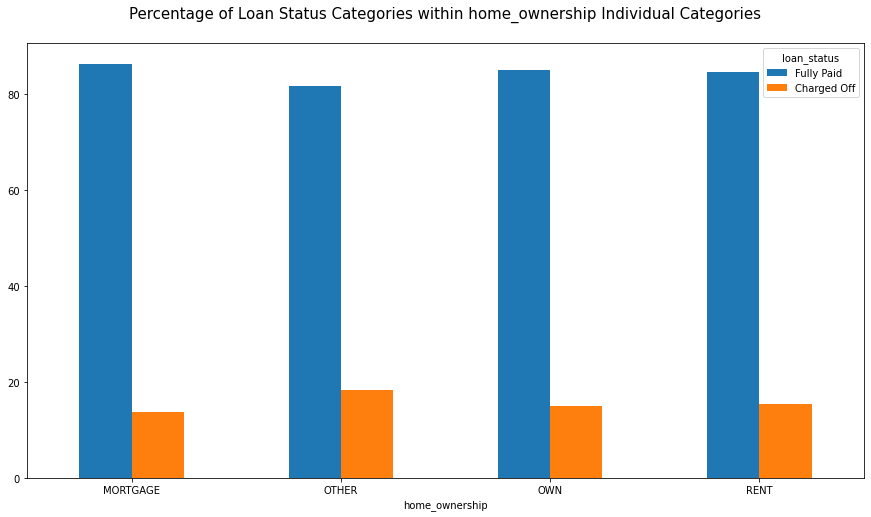

In [588]:
relation_with_target('home_ownership',figsize=(15,8))
plt.xticks(rotation=0);

#### Inference:
    1) OTHER category has highest default rate of ~18%

#### verification_status

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64 

 Not Verified      43.27449
Verified          31.64061
Source Verified   25.08490
Name: verification_status, dtype: float64


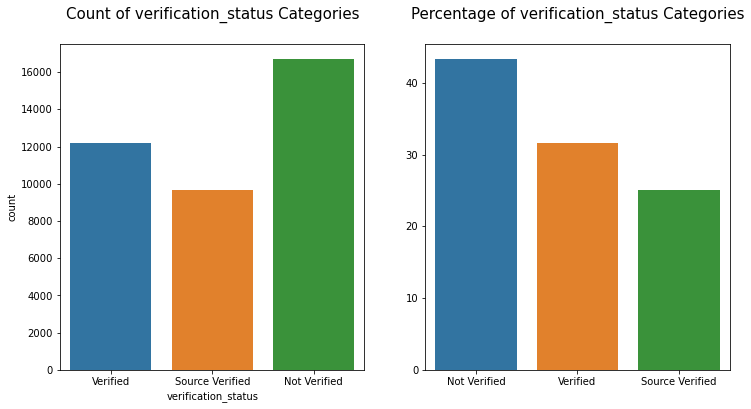

In [589]:
plot_countplot('verification_status',figsize=(12,6))
plt.xticks(rotation=0);

#### Inference:
    1) Verification Status column consists of 3 unique categories, Verified, Source Verified, Not Verified namely
    2) The count of Not Verified is highest with 16694(~43%) datapoints, followed by Verified with a count of 12206(~32%).
    3) Source Verified is the lowest category in terms of count of datapoints; i.e 9677(~ 25%) 

loan_status          Fully Paid  Charged Off
verification_status                         
Not Verified           87.16904     12.83096
Source Verified        85.18136     14.81864
Verified               83.19679     16.80321


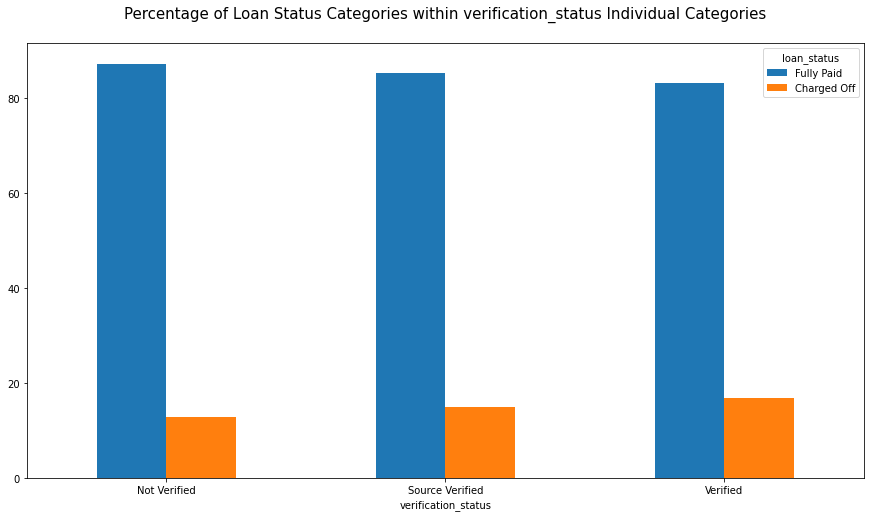

In [590]:
relation_with_target('verification_status',figsize=(15,8))
plt.xticks(rotation=0);

#### Inference:
    1) The default rate of Verified is highest(~17%)
    2) The default rate of Not Verified is lowest(~13%)
    3) The default rate of Source Verified is ~15%

#### purpose

In [591]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

#### Merging home_improvement and house into 1 category; house

In [592]:
df['purpose'] = np.where(df['purpose'].isin(['home_improvement','house']),'house',df['purpose'])

debt_consolidation    18055
credit_card            5027
other                  3865
house                  3242
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
educational             325
renewable_energy        102
Name: purpose, dtype: int64 

 debt_consolidation   46.80250
credit_card          13.03108
other                10.01892
house                 8.40397
major_purchase        5.57327
small_business        4.54675
car                   3.88574
wedding               2.40039
medical               1.76530
moving                1.49312
vacation              0.97208
educational           0.84247
renewable_energy      0.26441
Name: purpose, dtype: float64


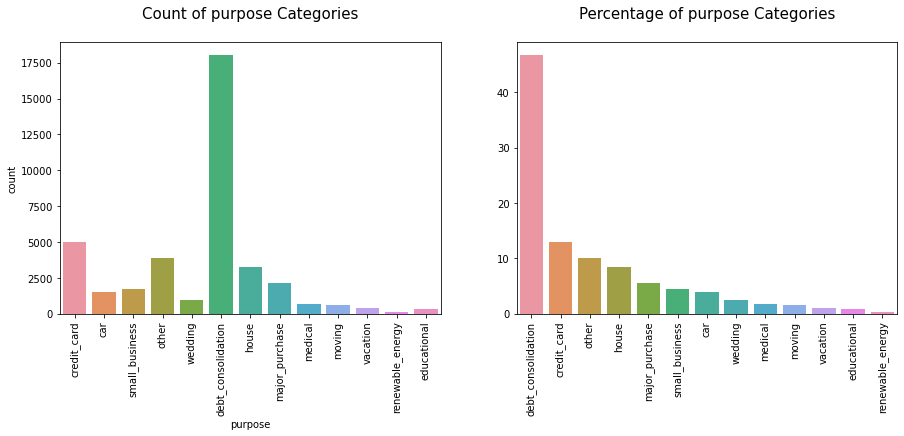

In [593]:
fig, ax = plot_countplot('purpose',figsize=(15,5))
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)

#### Inference:
    1) Purpose column consists of 13 unique categories
    2) The count of debt_consolidation is highest with 18055(~47%) datapoints, followed by credit_card 
    with a count of 5027(~13%).
    3) Renewable_energy is the lowest category in terms of count of datapoints; i.e 102(~0.26%)

loan_status         Fully Paid  Charged Off
purpose                                    
car                   89.32622     10.67378
credit_card           89.21822     10.78178
debt_consolidation    84.67461     15.32539
educational           82.76923     17.23077
house                 87.47687     12.52313
major_purchase        89.67442     10.32558
medical               84.43465     15.56535
moving                84.02778     15.97222
other                 83.62225     16.37775
renewable_energy      81.37255     18.62745
small_business        72.91904     27.08096
vacation              85.86667     14.13333
wedding               89.63283     10.36717


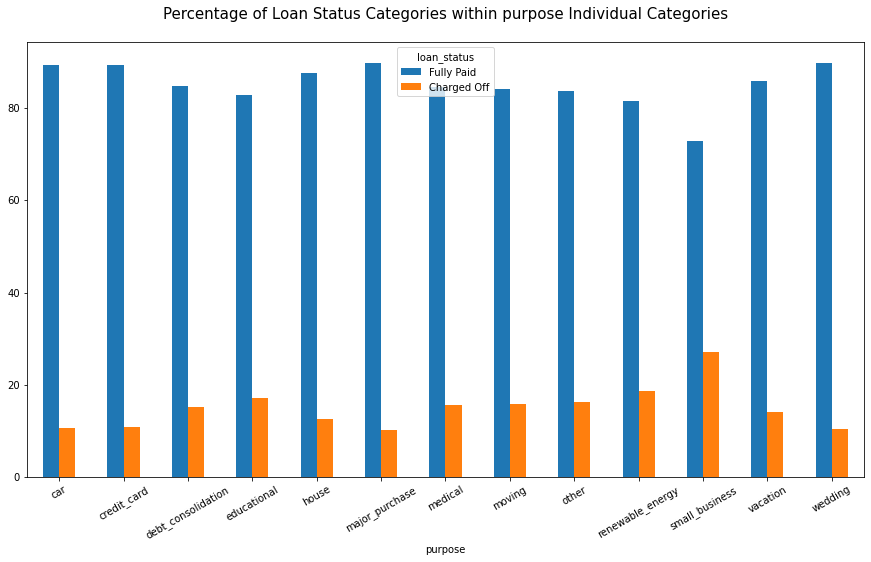

In [594]:
relation_with_target('purpose',figsize=(15,8))
plt.xticks(rotation=30);

#### Inference:
    1) The probability of default is highest for small_business(~27%),followed by renewable_energy(~18.6%)
    2) The probability of default is lowest for major_purchase(~10.3%), wedding(~10.4%)

#### addr_state

#### Outlier Treatment

#### Replacing datapoints where addr_state is in list [MS, TN, IN, ID, NE, IA, ME] value  with a new value of 'rare_addr_state' as the individual count of these values is very low

In [595]:
df['addr_state'] = np.where(df['addr_state'].isin(['MS','TN','IN','ID','NE','IA','ME']),'rare_addr_state',df['addr_state'])

In [596]:
df['addr_state'].value_counts()

CA                 6949
NY                 3698
FL                 2781
TX                 2659
NJ                 1790
IL                 1478
PA                 1468
VA                 1369
GA                 1359
MA                 1297
OH                 1178
MD                 1023
AZ                  849
WA                  818
CO                  766
NC                  750
CT                  726
MI                  704
MO                  670
MN                  605
NV                  479
SC                  459
WI                  440
OR                  435
AL                  435
LA                  427
KY                  311
OK                  287
KS                  255
UT                  252
AR                  235
DC                  211
RI                  194
NM                  183
WV                  172
NH                  166
HI                  166
DE                  113
MT                   83
WY                   80
AK                   78
rare_addr_state 

#### Inference:
    1) CA has highest datapoints(6949), followed by NY(3698), followed by FL(2781)

loan_status      Fully Paid  Charged Off
addr_state                              
AK                 80.76923     19.23077
AL                 87.58621     12.41379
AR                 88.51064     11.48936
AZ                 85.51237     14.48763
CA                 83.81062     16.18938
CO                 87.20627     12.79373
CT                 87.05234     12.94766
DC                 92.89100      7.10900
DE                 89.38053     10.61947
FL                 81.87702     18.12298
GA                 84.17954     15.82046
HI                 83.13253     16.86747
IL                 86.67118     13.32882
KS                 87.84314     12.15686
KY                 85.53055     14.46945
LA                 87.58782     12.41218
MA                 87.74094     12.25906
MD                 84.16422     15.83578
MI                 85.36932     14.63068
MN                 86.61157     13.38843
MO                 82.98507     17.01493
MT                 86.74699     13.25301
NC              

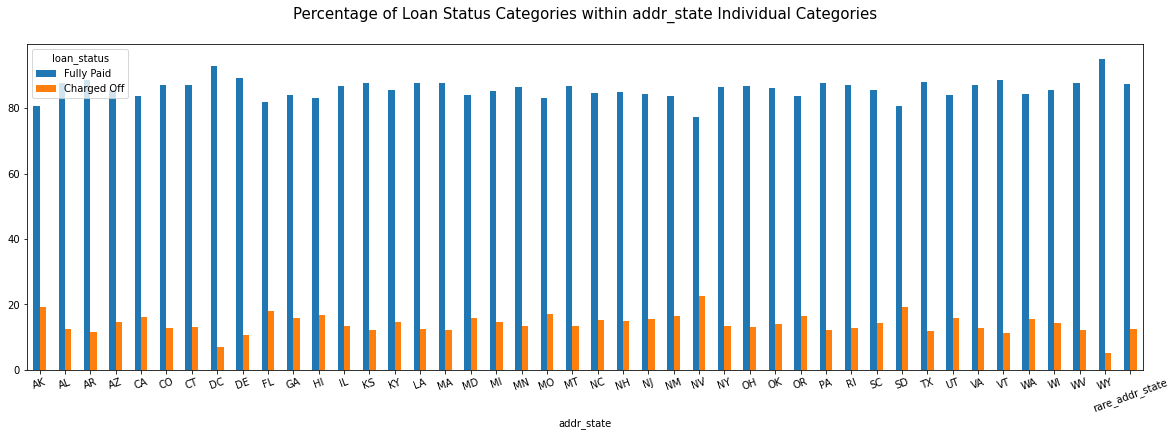

In [597]:
relation_with_target('addr_state',figsize=(20,6))
plt.xticks(rotation=20);

#### Inference:
    1) The address NV has highest default rate of ~22.5% followed by SD with ~19.35% followed by AK with a default rate of
    19.2%
    2) WY has the lowest default rate of 5%

#### open_acc

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
42       1
41       1
39       1
38       1
44       1
Name: open_acc, dtype: int64 

 7    10.13298
6     9.96967
8     9.88672
9     9.35013
5     8.06439
10    8.02810
11    6.91085
4     5.96210
12    5.69770
13    4.80856
3     3.81056
14    3.69910
15    2.97068
16    2.35373
17    1.85603
2     1.54496
18    1.33758
19    0.99541
20    0.72841
21    0.60917
22    0.35513
23    0.24108
24    0.19442
25    0.13739
26    0.08814
28    0.06221
27    0.05703
30    0.03888
29    0.03370
31    0.01815
34    0.01296
35    0.01037
32    0.00778
33    0.00778
36    0.00518
42    0.00259
41    0.00259
39    0.00

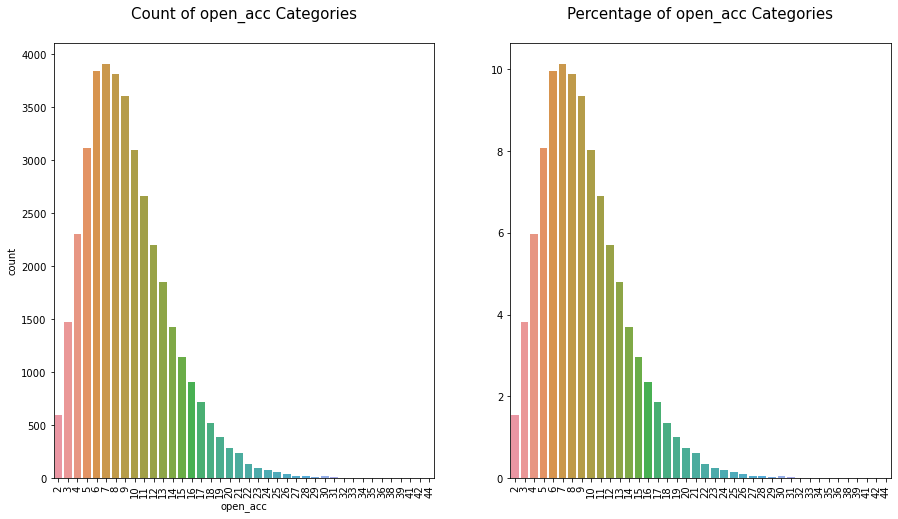

In [598]:
fig, ax = plot_countplot('open_acc',figsize=(15,8))
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90);

#### Outlier Treatment

#### Inference: The open_acc column when it takes a value from  [30,29,31,34,35,32,33,36,42,41,39,38,44] has a very low count , so replacing these values with the mode of the column

In [599]:
df['open_acc'] = np.where(df['open_acc'].isin([30,29,31,34,35,32,33,36,42,41,39,38,44]),df['open_acc'].mode()[0],
                          df['open_acc'])

7     3966
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
Name: open_acc, dtype: int64 

 7    10.28074
6     9.96967
8     9.88672
9     9.35013
5     8.06439
10    8.02810
11    6.91085
4     5.96210
12    5.69770
13    4.80856
3     3.81056
14    3.69910
15    2.97068
16    2.35373
17    1.85603
2     1.54496
18    1.33758
19    0.99541
20    0.72841
21    0.60917
22    0.35513
23    0.24108
24    0.19442
25    0.13739
26    0.08814
28    0.06221
27    0.05703
Name: open_acc, dtype: float64


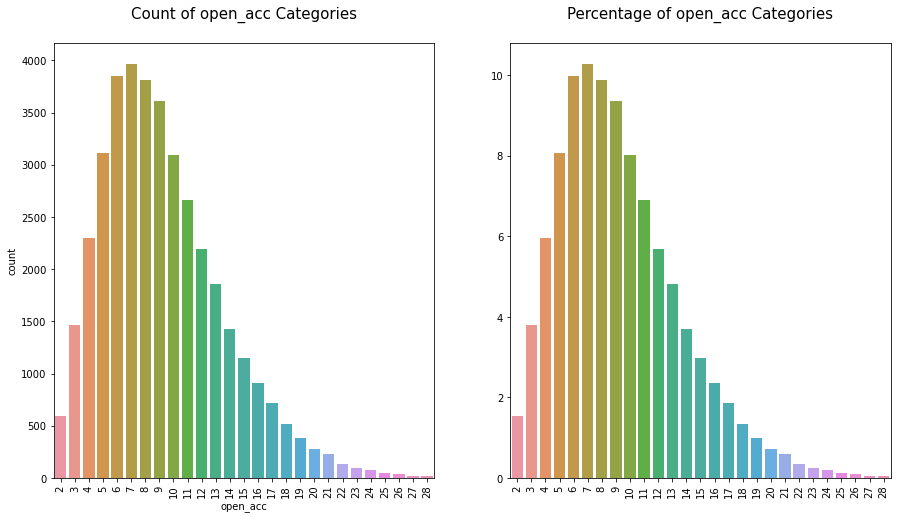

In [600]:
fig, ax = plot_countplot('open_acc',figsize=(15,8))
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90);

loan_status  Fully Paid  Charged Off
open_acc                            
2              78.69128     21.30872
3              82.44898     17.55102
4              84.17391     15.82609
5              86.33880     13.66120
6              85.88144     14.11856
7              85.65305     14.34695
8              85.68432     14.31568
9              85.63904     14.36096
10             84.98547     15.01453
11             85.67142     14.32858
12             86.30573     13.69427
13             85.82210     14.17790
14             84.79327     15.20673
15             85.34031     14.65969
16             88.43612     11.56388
17             85.75419     14.24581
18             86.82171     13.17829
19             84.63542     15.36458
20             85.05338     14.94662
21             84.25532     15.74468
22             86.86131     13.13869
23             87.09677     12.90323
24             88.00000     12.00000
25             79.24528     20.75472
26             79.41176     20.58824
2

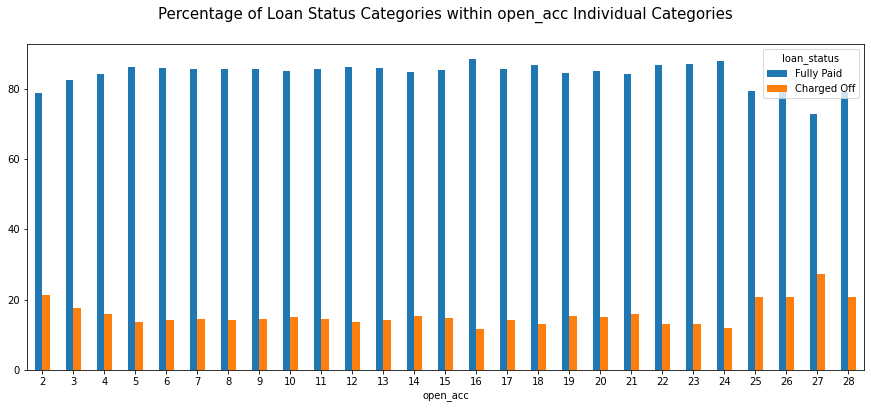

In [601]:
relation_with_target('open_acc',figsize=(15,6))

#### Inference:
    1) Their is no general pattern/ relationship of number of open accounts with loan status
    2) The default rate is higher than 20% when number of open accounts exceed 20

#### pub_rec

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64 

 0   94.63411
1    5.21814
2    0.12443
3    0.01815
4    0.00518
Name: pub_rec, dtype: float64


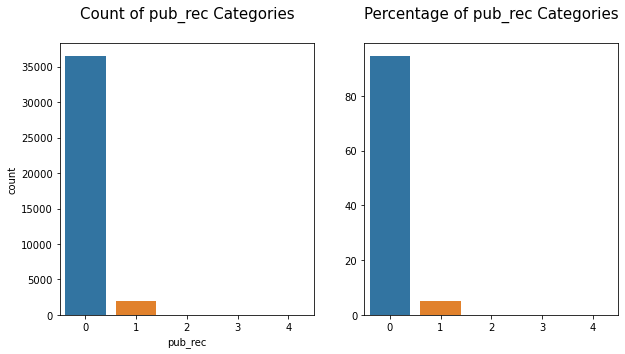

In [602]:
plot_countplot('pub_rec',figsize=(10,5));

#### Outlier Treatment

#### Inference: The category pub_rec= 3 and 4 have a very low count, so replacing their value with the mode of the column

In [603]:
df['pub_rec'] = np.where(df['pub_rec'].isin([3,4]),df['pub_rec'].mode()[0],df['pub_rec'])

0    36516
1     2013
2       48
Name: pub_rec, dtype: int64 

 0   94.65744
1    5.21814
2    0.12443
Name: pub_rec, dtype: float64


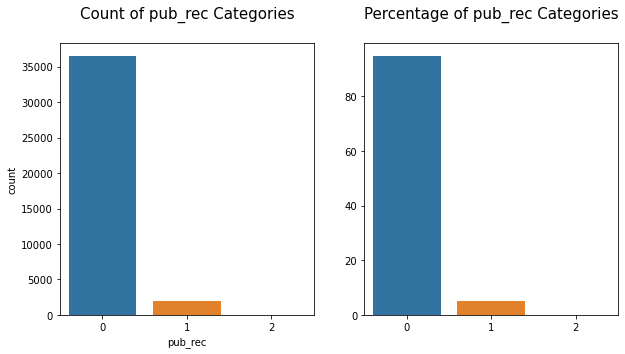

In [604]:
plot_countplot('pub_rec',figsize=(10,5));

#### Inference:
        1) Customers who have 0 derogatory public records are maximum in number 36516(~95%)

loan_status  Fully Paid  Charged Off
pub_rec                             
0              85.86921     14.13079
1              77.29757     22.70243
2              79.16667     20.83333


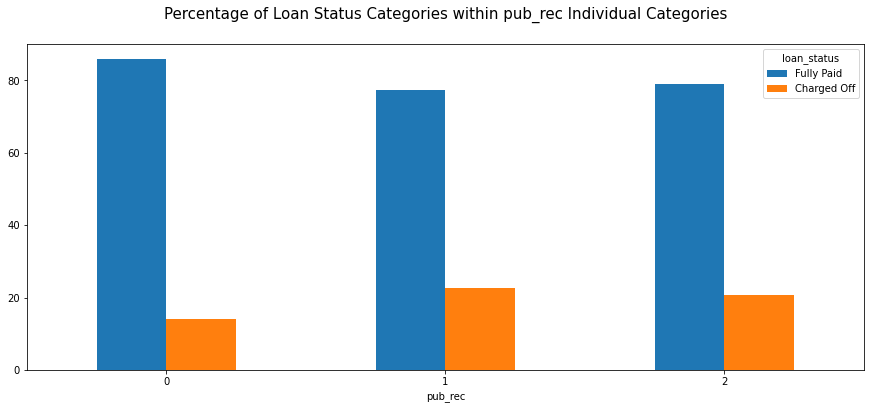

In [605]:
relation_with_target('pub_rec',figsize=(15,6))

#### Inference: Customers with known derogatory public records more prone for default

#### pub_rec_bankruptcies

0.0                             36238
1.0                              1637
unknown_pub_rec_bankruptcies      697
2.0                                 5
Name: pub_rec_bankruptcies, dtype: int64 

 0.0                            93.93680
1.0                             4.24346
unknown_pub_rec_bankruptcies    1.80678
2.0                             0.01296
Name: pub_rec_bankruptcies, dtype: float64


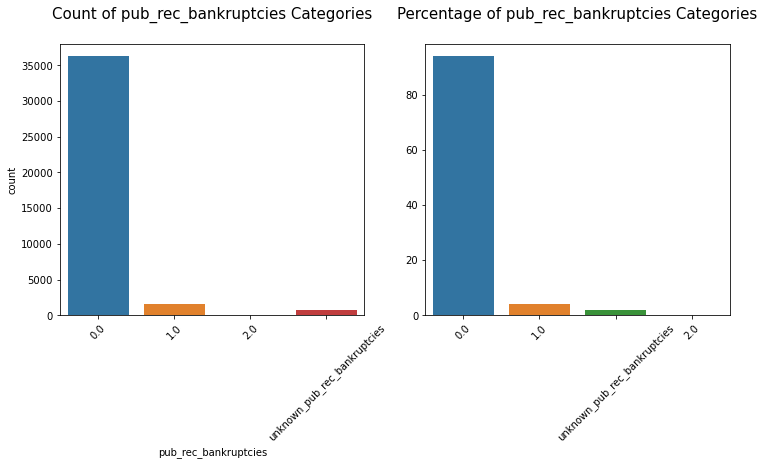

In [606]:
fig, ax = plot_countplot('pub_rec_bankruptcies',figsize=(12,5))
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

#### Inference:
        1) Customers who have 0 public record of bankruptcies are maximum in number 36238(~94%)

#### Outlier Treatment

#### Inference: The category pub_rec_bankruptcies=2 has a very low count, so replacing its value with the mode of the column

In [607]:
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']==2,df['pub_rec_bankruptcies'].mode()[0],
                                      df['pub_rec_bankruptcies'])

In [608]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(str)

0.0                             36243
1.0                              1637
unknown_pub_rec_bankruptcies      697
Name: pub_rec_bankruptcies, dtype: int64 

 0.0                            93.94976
1.0                             4.24346
unknown_pub_rec_bankruptcies    1.80678
Name: pub_rec_bankruptcies, dtype: float64


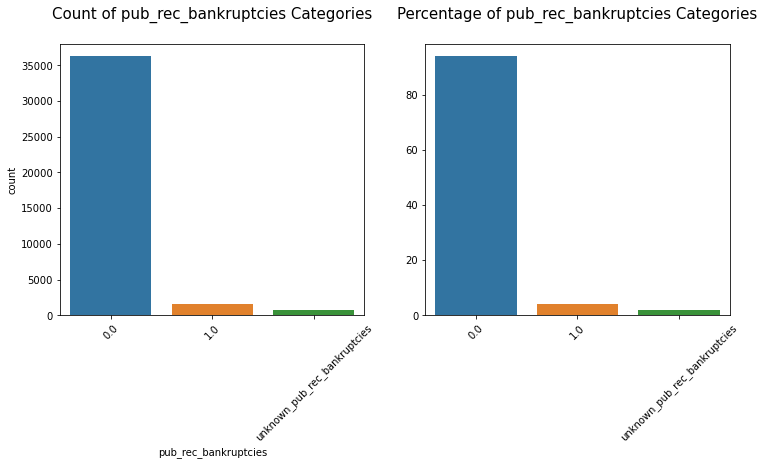

In [609]:
fig, ax = plot_countplot('pub_rec_bankruptcies',figsize=(12,5))
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

loan_status                   Fully Paid  Charged Off
pub_rec_bankruptcies                                 
0.0                             85.80967     14.19033
1.0                             77.64203     22.35797
unknown_pub_rec_bankruptcies    83.07030     16.92970


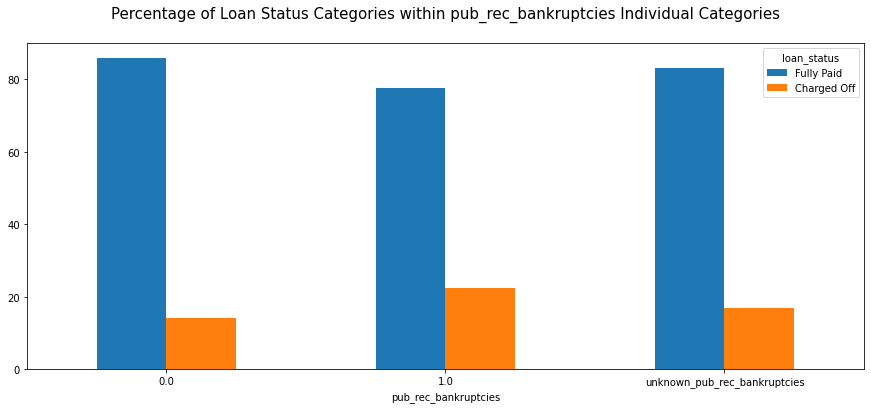

In [610]:
relation_with_target('pub_rec_bankruptcies',figsize=(15,6))

#### Inference: Customers with known public bankruptcies more prone for default

## Multivariate Analysis

### 2 Continuous variables with loan status column

#### Utility Function

In [611]:
def bivariate(col_1,col_2):
    try:
        x = df.groupby([col_1,col_2]).apply(lambda x:x['loan_status'].value_counts())
        x['Charged Off'] = np.where(x['Charged Off']<=30,np.nan,x['Charged Off'])
        x = x.groupby([col_1,col_2]).apply(lambda x:100*(x/x.sum(axis=1).reset_index(drop=True).values[0])).reset_index()
        sns.heatmap(x.pivot_table(index=col_2,columns=col_1,values='Charged Off'),
                    cmap='Greens',annot=True)
    except Exception as e:
        x = df.groupby([col_1,col_2]).apply(lambda x:x['loan_status'].value_counts())
        x = x[x>=30]
        x= x.groupby([col_1,col_2]).apply(lambda x:x/x.sum()).reset_index()
        x = x[x['level_2']=='Charged Off']
        sns.heatmap(x.pivot_table(index=col_2,columns=col_1,values='loan_status'),
                        cmap='Greens',annot=True)

#### loan_amnt_groups and int_rate with loan status

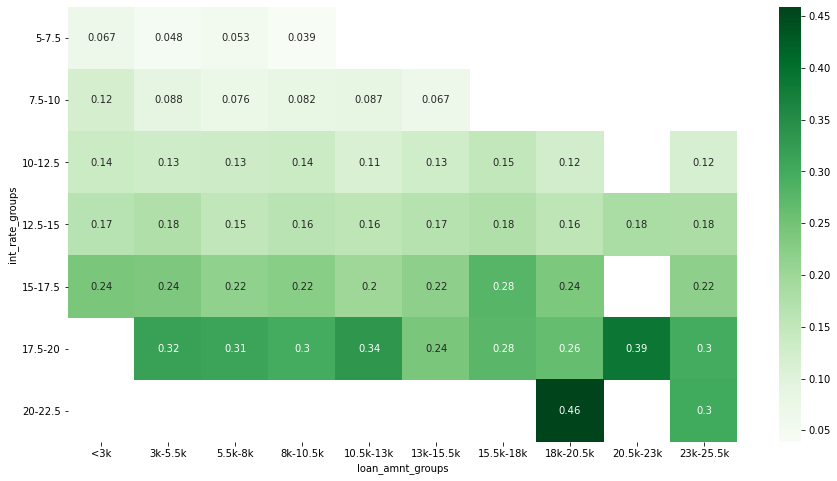

In [612]:
plt.figure(figsize=(15,8))
bivariate('loan_amnt_groups','int_rate_groups')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of interest rate with loan status showed us that with interest rate the default rate
      increases. Same analysis is shown in this graph also.
     3) Customers taking any loan amount but with interest rate greater than 15% are much more prone to default

#### loan_amnt and annual_inc with loan status

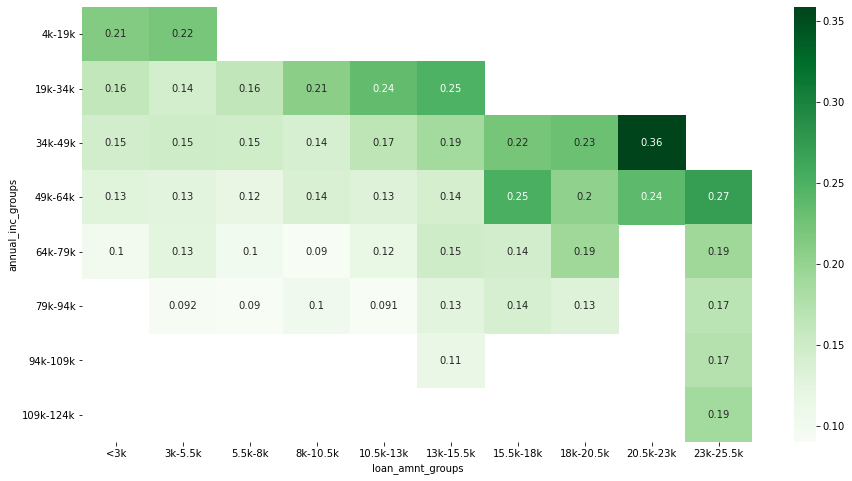

In [613]:
plt.figure(figsize=(15,8))
bivariate('loan_amnt_groups','annual_inc_groups')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of annual income with loan status showed us that with increasing annual income the default
      rate decreases. Same analysis is shown in this graph also.
     3) Customers taking loan amount greater than 10.5K and annual income less than 64k have more prone for default
 
    

#### loan_amnt and dti with loan status

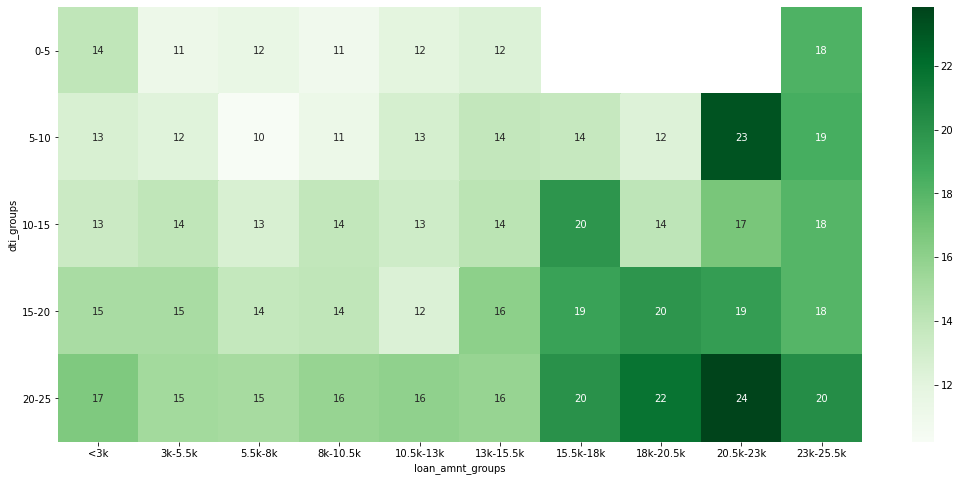

In [614]:
plt.figure(figsize=(18,8))
bivariate('loan_amnt_groups','dti_groups')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of dti with loan status showed us that with increasing dti the default rate
      increases. Same analysis is shown in this graph also.
     3) Customers taking loan amount greater than 15.5K and dti greater than 10 have more prone for default

#### loan_amnt and revol_util with loan status

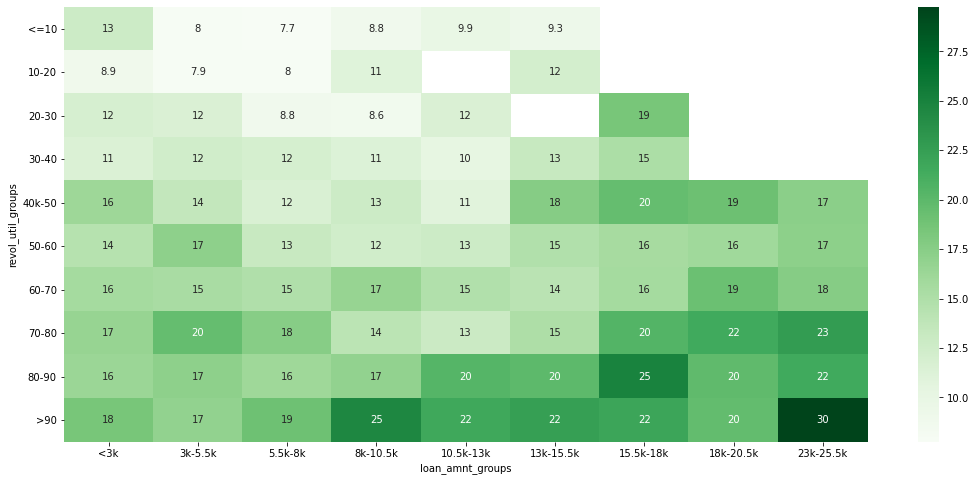

In [615]:
plt.figure(figsize=(18,8))
bivariate('loan_amnt_groups','revol_util_groups')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of revolving rate income with loan status showed us that with increasing revolving rate the
      default rate increases.Same analysis is shown in this graph also.
     3) Customers having loan amount greater than 10.5K and revolving rate greater than 70 have more prone for default

#### annual_inc and int_rate with loan status

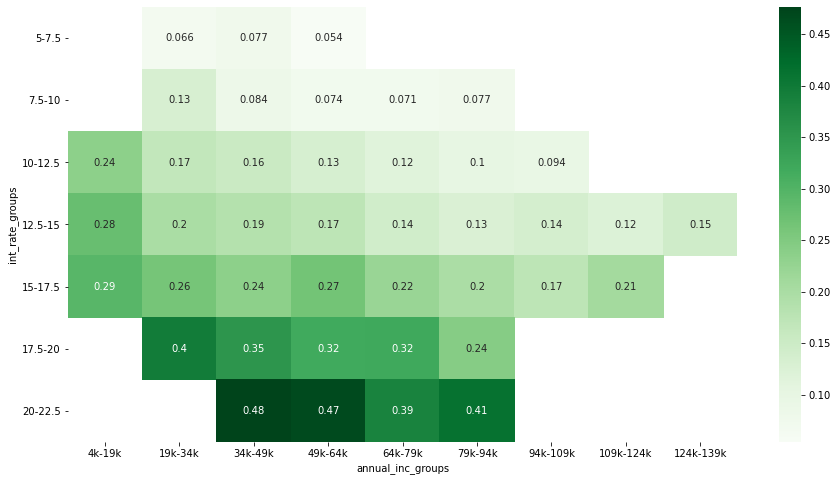

In [616]:
plt.figure(figsize=(15,8))
bivariate('annual_inc_groups','int_rate_groups')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of annual income with loan status showed us that with increasing annual income the
     default rate decreases. Same analysis is shown in this graph also.
     2) The bivariate analysis of interest rate with loan status showed us that with interest rate the default rate
      increases. Same analysis is shown in this graph also.
     3) Customers having annual income less than 94k and interest rate greater than 15 have more prone for default

### 1 Continuous + 1 Categorical with loan status column

#### loan_amnt and term with loan status

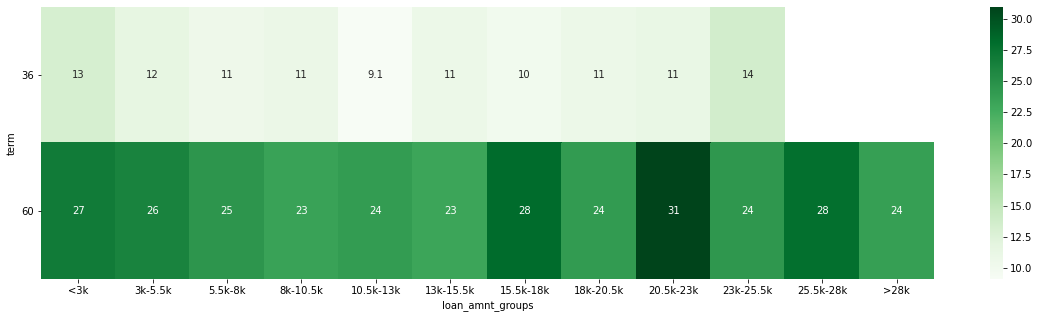

In [617]:
plt.figure(figsize=(20,5))
bivariate('loan_amnt_groups','term')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of term with loan status showed us that customers who take loan for 60 months are more 
      prone to deafult. Same analysis is shown in this graph also.
     3) Customers taking any loan amount but for term of 60 months are more prone for default than customers taking the
      same amount for 30 months.
 

#### loan_amnt and grade with loan status

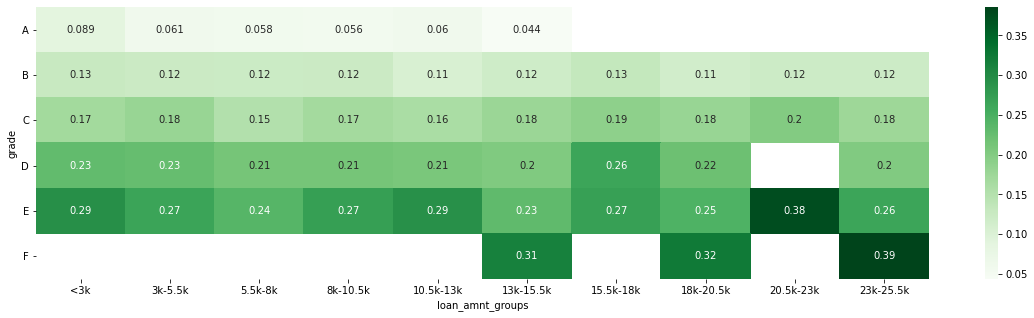

In [618]:
plt.figure(figsize=(20,5))
bivariate('loan_amnt_groups','grade')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of grade with loan status showed us that with increasing alphabetical order of grades 
      the default rate also increases. Same analysis is shown in this graph also.
     3) Customers taking any loan amount but beloning to grade C, D, E or F are more prone for default.

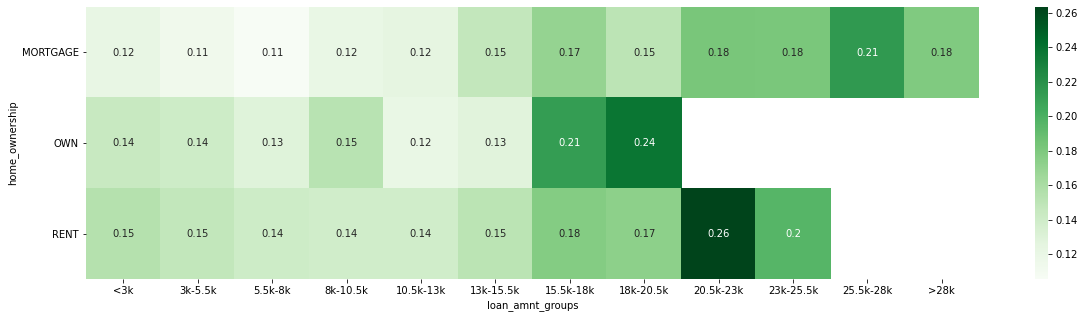

In [619]:
plt.figure(figsize=(20,5))
bivariate('loan_amnt_groups','home_ownership')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of home onwership with loan status showed us no clear relationship. Same analysis is 
      shown in this graph also.

#### loan_amnt and verification status with loan status

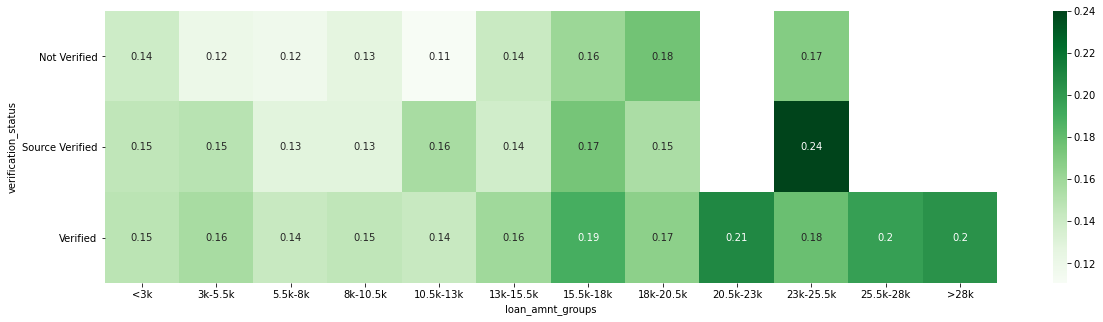

In [620]:
plt.figure(figsize=(20,5))
bivariate('loan_amnt_groups','verification_status')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of verification status with loan status showed us no clear relationship. Same analysis is 
      shown in this graph also.

#### loan_amnt and purpose with loan status

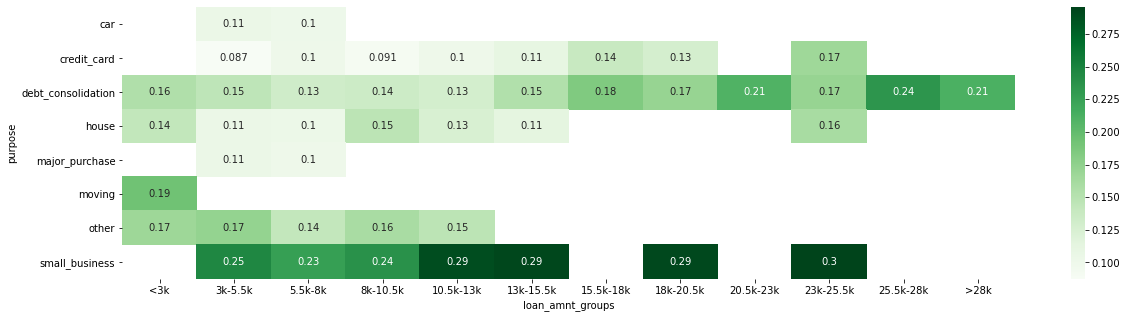

In [621]:
plt.figure(figsize=(20,5))
bivariate('loan_amnt_groups','purpose')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of purpose with loan status showed us that when purpose was small business the default risk
      was highest. Same analysis is shown in this graph also.
     3) Customers taking any loan amount for small business purpose are most prone for default

#### loan_amnt and pub_rec_bankruptcies with loan status 

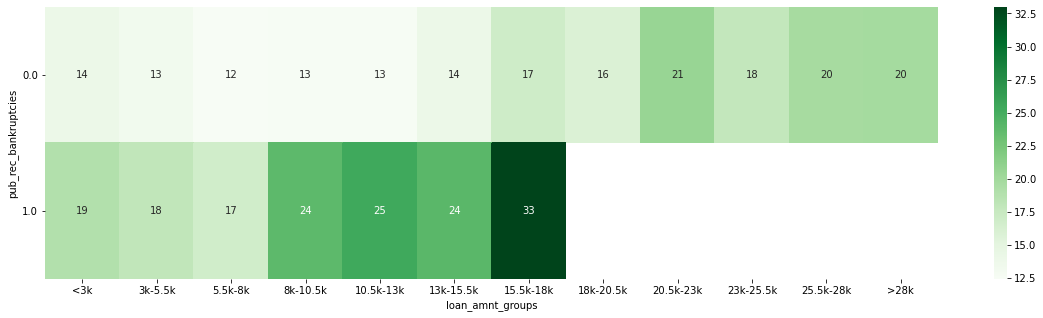

In [622]:
plt.figure(figsize=(20,5))
bivariate('loan_amnt_groups','pub_rec_bankruptcies')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of loan amount with loan status showed us that with increasing loan amount the default rate
      increases. Same analysis is shown in this graph also.
     2) The bivariate analysis of pub_rec_bankruptcies with loan status showed us that customers having atleast one public 
      record of bankruptcy are more for default. Same analysis is shown in this graph also.
     3) Customers taking any loan amount but having a public record of bankruptcy are more prone for default.

#### annual_inc and term with loan status

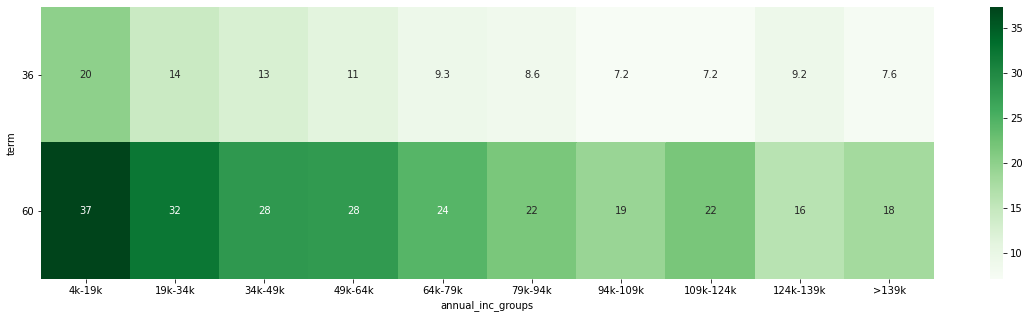

In [623]:
plt.figure(figsize=(20,5))
bivariate('annual_inc_groups','term')
plt.yticks(rotation=0);

#### Inference:
     1) The bivariate analysis of annual income with loan status showed us that with increasing annual income the 
      default rate decreases. Same analysis is shown in this graph also.
     2) The bivariate analysis of term with loan status showed us that customers who take loan for 60 months are more 
      prone to deafult. Same analysis is shown in this graph also.
     3) Customers having any annual income but taking loan for a term of 60 months are more prone for default.

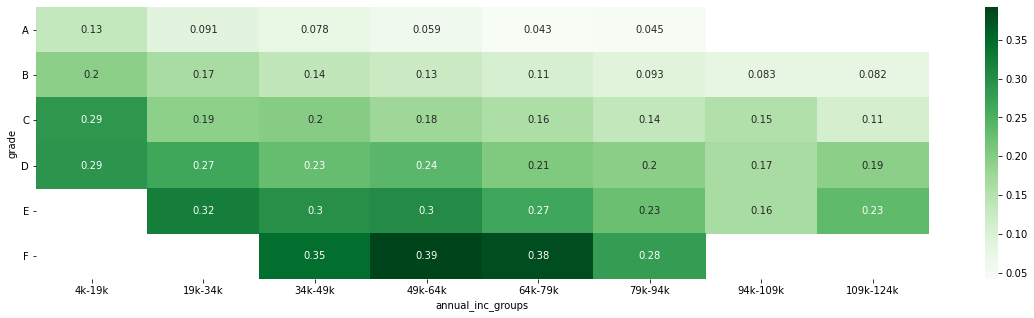

In [624]:
plt.figure(figsize=(20,5))
bivariate('annual_inc_groups','grade')
plt.yticks(rotation=0);

#### Inference:
      1) The bivariate analysis of annual income with loan status showed us that with increasing annual income the 
      default rate decreases. Same analysis is shown in this graph also.
      2) The bivariate analysis of grade with loan status showed us that with increasing alphabetical order of grades 
      the default rate also increases. Same analysis is shown in this graph also.
      3) Customers having annual income less than 79k and belonging to grade C, D, E or F are more prone for default

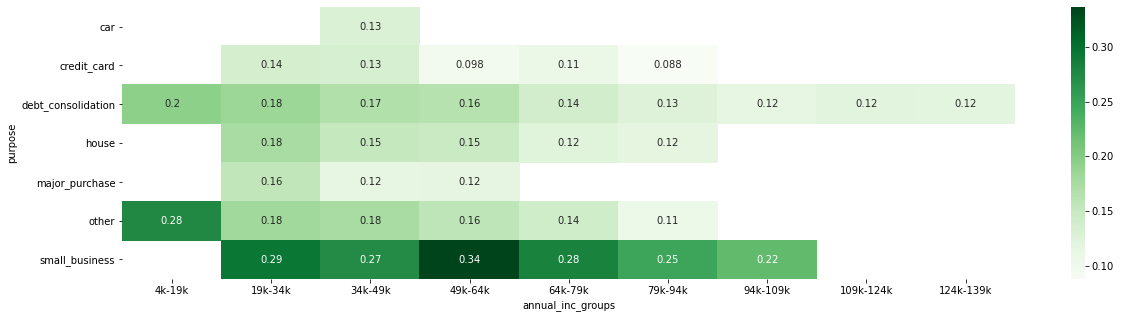

In [625]:
plt.figure(figsize=(20,5))
bivariate('annual_inc_groups','purpose')
plt.yticks(rotation=0);

#### Inference:
      1) The bivariate analysis of annual income with loan status showed us that with increasing annual income the 
      default rate decreases. Same analysis is shown in this graph also.
      2) The bivariate analysis of purpose with loan status showed us that when purpose was small business the 
      default risk was highest. Same analysis is shown in this graph also.
      3) Customers having any annual income and taking loan for small business purpose are most prone for default

#### annual_inc and home_ownership with loan status

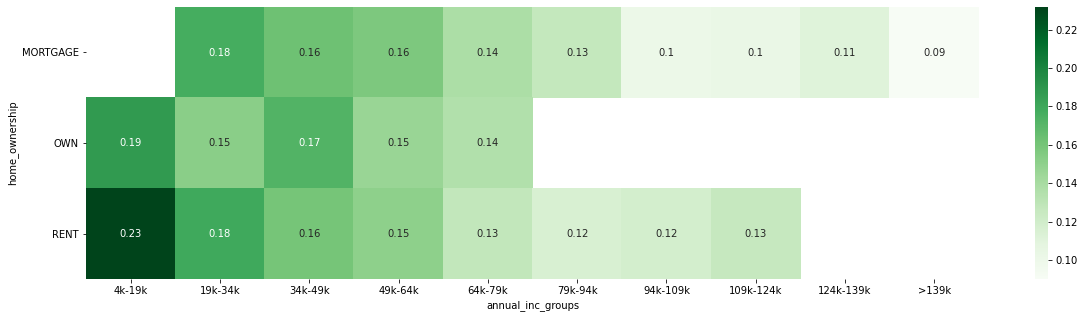

In [626]:
plt.figure(figsize=(20,5))
bivariate('annual_inc_groups','home_ownership')
plt.yticks(rotation=0);

#### Inference:
      1) The bivariate analysis of annual income with loan status showed us that with increasing annual income the 
      default rate decreases. Same analysis is shown in this graph also.
      2) The bivariate analysis of home onwership with loan status showed us no clear relationship. Same analysis is 
      shown in this graph also.

## Overall Analysis:

### Based on the EDA, we have identified the following features as most important in detecting default loans

### a) loan amount
	1) With increasing loan amount the probability of defaults also increases.
	2) when the loan amount is greater than 13k, the default rate is always greater than the overall dataset 
       default rate of14.5%
	
### b) Interest Rate
	1) With increasing interest rate the probability of defaults also increases
	2) when the interest rate is greater than 12.5%, the default rate is always greater than the overall dataset 
       default rate of 14.5%
	
### c) Annual Income
	1) With increasing annual income the probability of defaults decreases
	2) when the annual income is less than 64k, the default rate is always greater than the overall dataset
       default rate of 14.5%
	

### d) Debt to Annual Income Ratio
	1) With increasing debt to annual income ratio the probability of defaults also increases
	2) when this ratio is greater than 10, the default rate is always greater than the overall dataset default rate of 14.5%
	
### e) Revolving line utilization rate
	1) With increasing revolving line utilization rate the probability of defaults also increases
	2 when this rate is greater than 40, the default rate is always greater than the overall dataset default rate of 14.5%
	
### f) term
   
	1) The probability of default is more high for a loan given for 60 months than for 36 months
	2) For 36 months the default rate is 11% and for 60 months its 25%
	
### g) grade
   
    1) The probability of default increases as we move in alphabetical order of grades; i.e the probability of default 
        is more in G grade (~34%),less in F(~33%), more less in E(~27%) and same pattern follows till A(~6%).
	2) Their is a order associated with grade
	3) From grade C onward till G, the default rate is always greater than the overall dataset default rate of 14.5%
	
### h) sub-grade

    1) Sub Grade column follows the same pattern as that of grade with loan status column leaving a few exceptions;
       i.e the A sub grades default rate is lower than of B, B sub grades have a default rate less than of C 
       and same pattern follows till G sub grades
    2) Within each grade the the default rate increases with alphabetical order,eg; within A grade the default rate 
       of A1 is less than of A2,A2 is less than of A3, A3 is less than of A4 and A4 is less than of A5.
    3) The default rate of F5 is highest(~48%) and that of A1 is lowest(~2.6%) among all sub-grades
	4) From all sub-grade C onward till all sub-grade of G, the default rate is always greater than the overall 
       dataset default rate of 14.5%
	
### i) purpose

    1) The probability of default is highest for small_business(~27%),followed by renewable_energy(~18.6%)
	2) When the loan is taken for debt_consolidation, educational, medical, moving, other, renewable_energy, 
       small_business then the default rate is always greater than the overall dataset default rate of 14.5%
	  
### j)  derogatory public records

	1) Customers with known derogatory public records more prone for default with rate greater than the overall 
       dataset default rate of 14.5% 
	
### k)  known public bankruptcies

    1) Customers with known public bankruptcies more prone for default with rate greater than the overall 
       dataset default rate of 14.5% 
	
l) Customers taking any loan amount but with interest rate greater than 15% are much more prone to default with default rate greater than 14.5% 

m) Customers taking loan amount greater than 10.5K and annual income less than 64k have more prone for default with default rate greater than 14.5%

n) Customers taking loan amount greater than 15.5K and dti greater than 10 have more prone for default with default rate greater than 14.5%

o) Customers having loan amount greater than 10.5K and revolving rate greater than 70 have more prone for default with default rate greater than 14.5%

p) Customers having annual income less than 94k and interest rate greater than 15 have more prone for default with default rate greater than 14.5%

q) Customers taking any loan amount but for term of 60 months are more prone for default than customers taking the same amount for 30 months
with default rate greater than 14.5%

r) Customers taking any loan amount but beloning to grade C, D, E or F are more prone for default with default rate greater than 14.5%

s) Customers taking any loan amount but having a public record of bankruptcy are more prone for default with default rate greater than 14.5%

t) Customers having any annual income but taking loan for a term of 60 months are more prone for default with default rate greater than 14.5%

u) Customers having annual income less than 79k and belonging to grade C, D, E or F are more prone for default with default rate greater than 14.5%

v) Customers having any annual income and taking loan for small business purpose are most prone for default with default rate greater than 14.5%

x) Customers having annual income less than 64k and taking loan for debt consolidation, housing or other purposes 
are most prone for default with default rate greater than 14.5%
​